In [1]:
from astropy.io import fits
import matplotlib.pyplot as plt
import os, sys

dirpath = os.getcwd().split("code")[0]+"code/"
sys.path.append(dirpath)
from pre_process import clean_LC

folder = "../KOI_Data/sample/"

In [2]:
import os

fits_available = os.listdir(folder)
fits_available[:3]

['kplr001026032-20160128150956_dvt.fits',
 'kplr001432214-20160128150956_dvt.fits',
 'kplr001025986-20160128150956_dvt.fits']

In [18]:
a = fits.open(folder+fits_available[0])
b = fits.open(folder+fits_available[1])
c = fits.open(folder+fits_available[2])
print(len(a[1].data.field("LC_INIT")))
print(len(b[1].data.field("LC_INIT")))
print(len(c[1].data.field("LC_INIT")))

71427
71427
71427


In [6]:
hdulist = fits.open(folder+fits_available[4])

hdulist.info()

Filename: ../KOI_Data/sample/kplr001431122-20160128150956_dvt.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      56   ()      
  1  TCE_1         1 BinTableHDU    106   71427R x 10C   [D, E, J, E, E, E, E, E, E, E]   
  2  Statistics    1 BinTableHDU    221   71427R x 50C   [D, E, J, E, E, E, E, J, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E]   


In [7]:
hdulist[1].header

XTENSION= 'BINTABLE'           / marks the beginning of a new HDU               
BITPIX  =                    8 / array data type                                
NAXIS   =                    2 / number of array dimensions                     
NAXIS1  =                   44 / length of first array dimension                
NAXIS2  =                71427 / length of second array dimension               
PCOUNT  =                    0 / group parameter count (not used)               
GCOUNT  =                    1 / group count (not used)                         
TFIELDS =                   10 / number of table fields                         
TTYPE1  = 'TIME    '           / column title: data time stamps                 
TFORM1  = 'D       '           / column format: 64-bit floating point           
TUNIT1  = 'BJD - 2454833'      / column units: barycenter corrected JD          
TDISP1  = 'D14.7   '           / column display format                          
TTYPE2  = 'TIMECORR'        

In [8]:
data = hdulist[1].data

time = data.field('TIME')
lc_init = data.field("LC_INIT")
lc_error = data.field("LC_INIT_ERR")
lc_white = data.field("LC_WHITE")
lc_detrend = data.field("LC_DETREND")
time

array([ 131.5126894 ,  131.53312411,  131.55355871, ..., 1590.96063093,
       1590.98106548, 1591.00150022])

In [9]:
#plot until
p_n = 1000

In [15]:
hdulist[1].data.field("LC_INIT")

array([-4.7542781e-04, -2.8195378e-04, -7.9507794e-05, ...,
       -1.8654378e-04,  6.1095980e-06,  3.3812580e-04], dtype=float32)

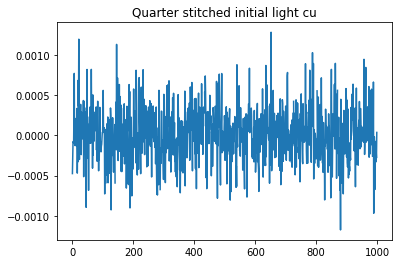

In [12]:
plt.plot(lc_init[:p_n])
plt.title("Quarter stitched initial light cu")
plt.show()

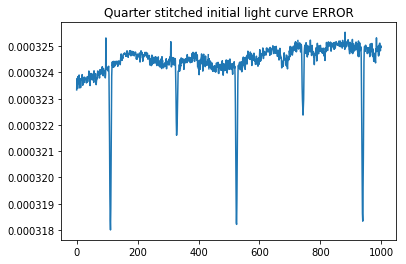

In [7]:
plt.plot(lc_error[:p_n])
plt.title("Quarter stitched initial light curve ERROR")
plt.show()

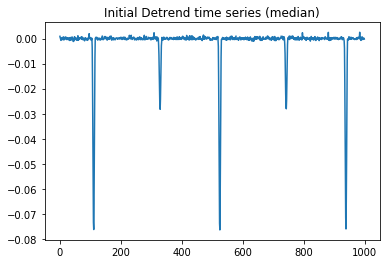

In [8]:
plt.plot(lc_detrend[:p_n])
plt.title("Initial Detrend time series (median)")
plt.show()

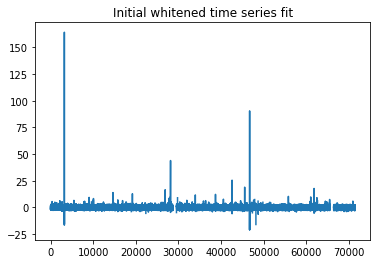

In [10]:
plt.plot(lc_white[:p_n])
plt.title("Initial whitened time series fit")
plt.show()

/home/casapanshop/anaconda2/envs/py3/lib/python3.5/site-packages/numpy/lib/function_base.py:4033: RuntimeWarning: All-NaN slice encountered
  r = func(a, **kwargs)


Clean done (remove outliers iterativetly), erase 1 values


/home/fmena/Desktop/LC_process/PIIC19/code/pre_process.py:120: RuntimeWarning: invalid value encountered in less
  mask_nan = (f_clean - med < -sigm_low * MAD) | (f_clean - med > sigm_up * MAD)
/home/fmena/Desktop/LC_process/PIIC19/code/pre_process.py:120: RuntimeWarning: invalid value encountered in greater
  mask_nan = (f_clean - med < -sigm_low * MAD) | (f_clean - med > sigm_up * MAD)


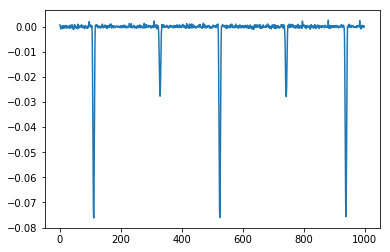

In [9]:
final_lc = clean_LC(lc_init, kernel_median=25, detrend_median=True) 
plt.plot(final_lc[:p_n])

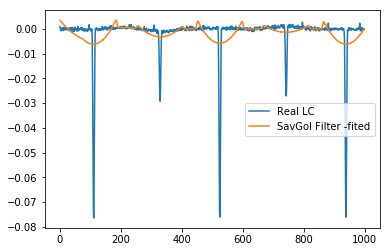

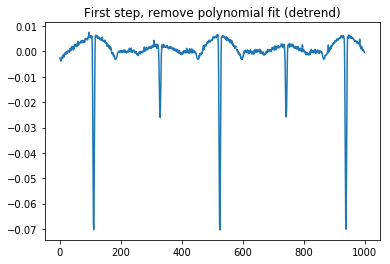

/home/casapanshop/anaconda2/envs/py3/lib/python3.5/site-packages/numpy/lib/function_base.py:4033: RuntimeWarning: All-NaN slice encountered
  r = func(a, **kwargs)


Clean done (remove outliers iterativetly), erase 1 values


/home/fmena/Desktop/LC_process/PIIC19/code/pre_process.py:120: RuntimeWarning: invalid value encountered in less
  mask_nan = (f_clean - med < -sigm_low * MAD) | (f_clean - med > sigm_up * MAD)
/home/fmena/Desktop/LC_process/PIIC19/code/pre_process.py:120: RuntimeWarning: invalid value encountered in greater
  mask_nan = (f_clean - med < -sigm_low * MAD) | (f_clean - med > sigm_up * MAD)


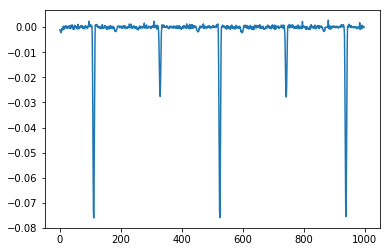

In [10]:
final_lc = clean_LC(lc_init, kernel_median=25, kernel_pol=151) 
plt.plot(final_lc[:p_n])

UNA CURVA DE LUZ


/home/fmena/anaconda2/envs/py3/lib/python3.5/site-packages/numpy/lib/function_base.py:4016: RuntimeWarning: All-NaN slice encountered
  r = func(a, **kwargs)


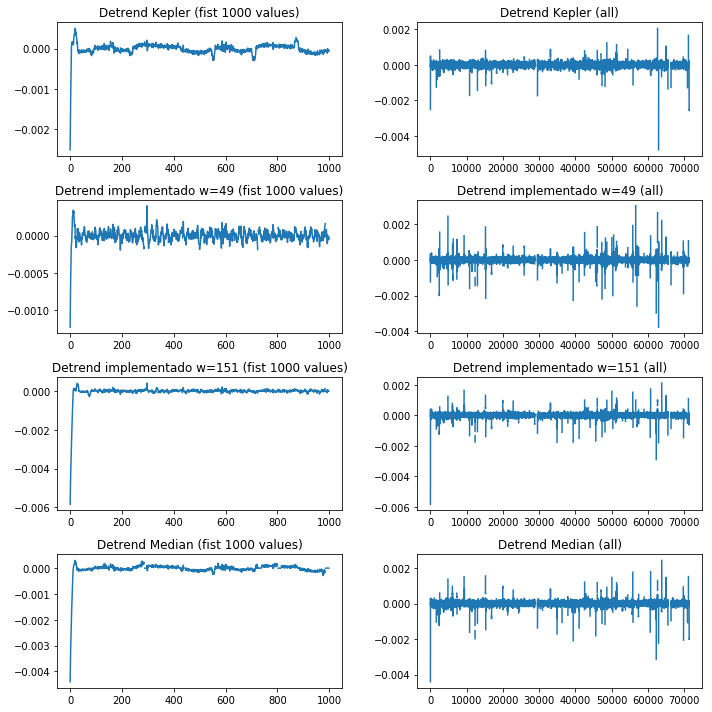

UNA CURVA DE LUZ


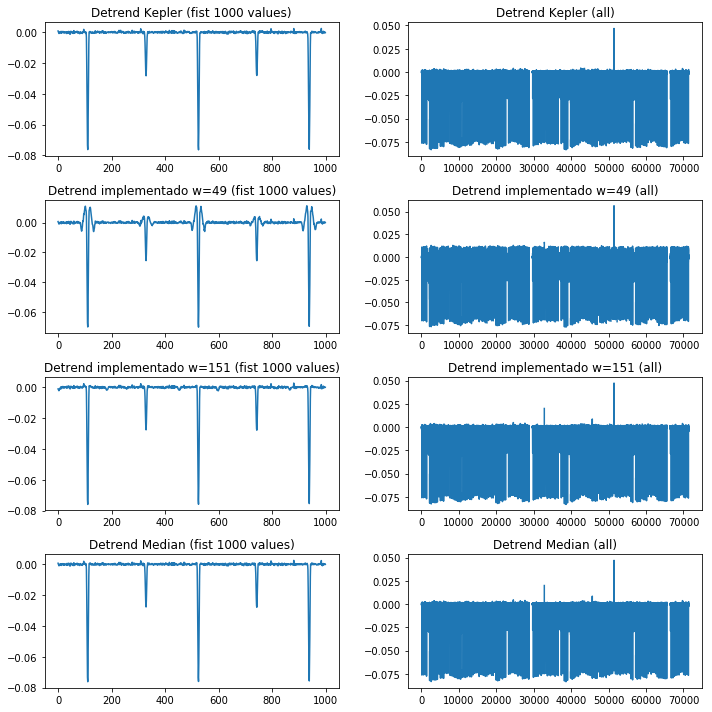

UNA CURVA DE LUZ


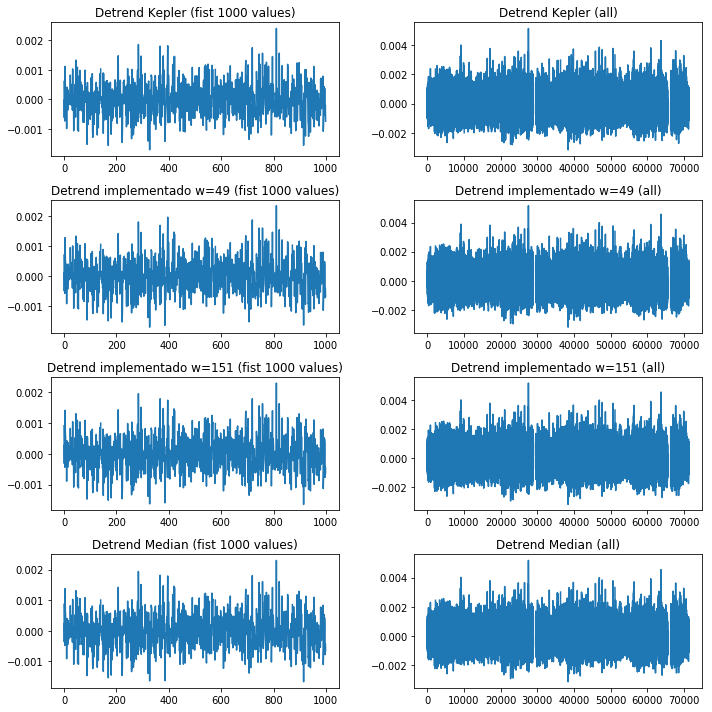

UNA CURVA DE LUZ


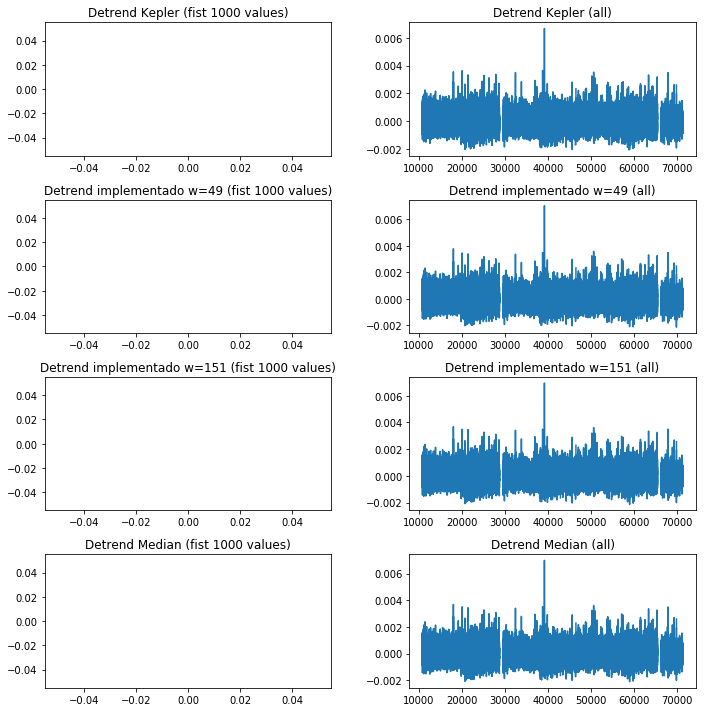

UNA CURVA DE LUZ


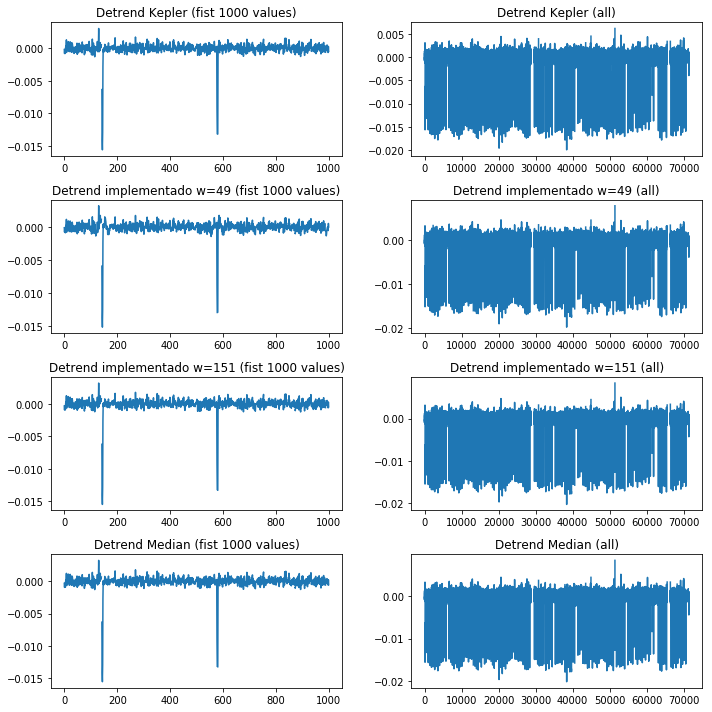

UNA CURVA DE LUZ


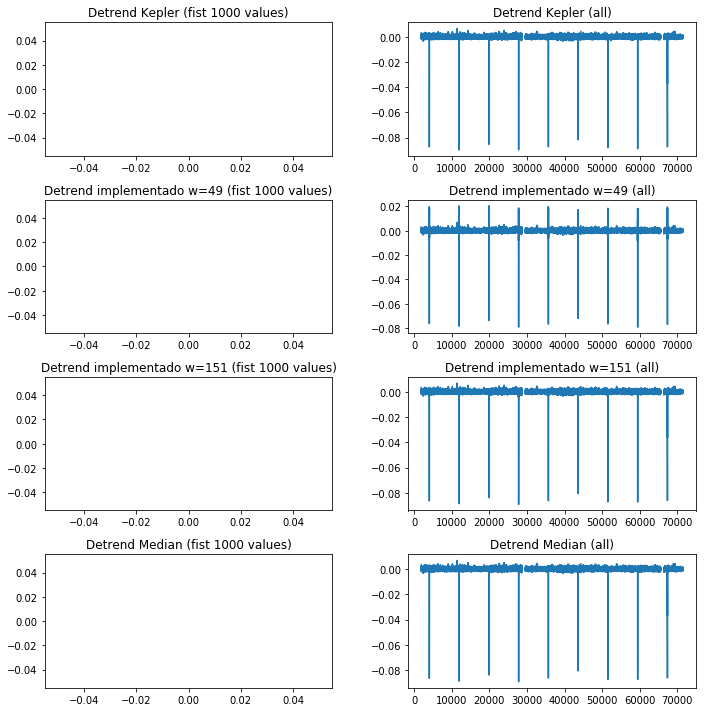

UNA CURVA DE LUZ


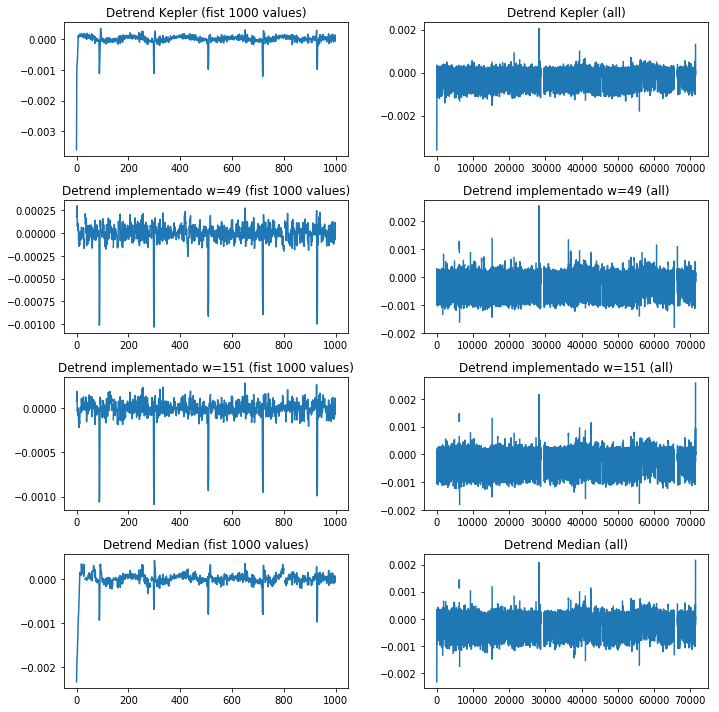

UNA CURVA DE LUZ


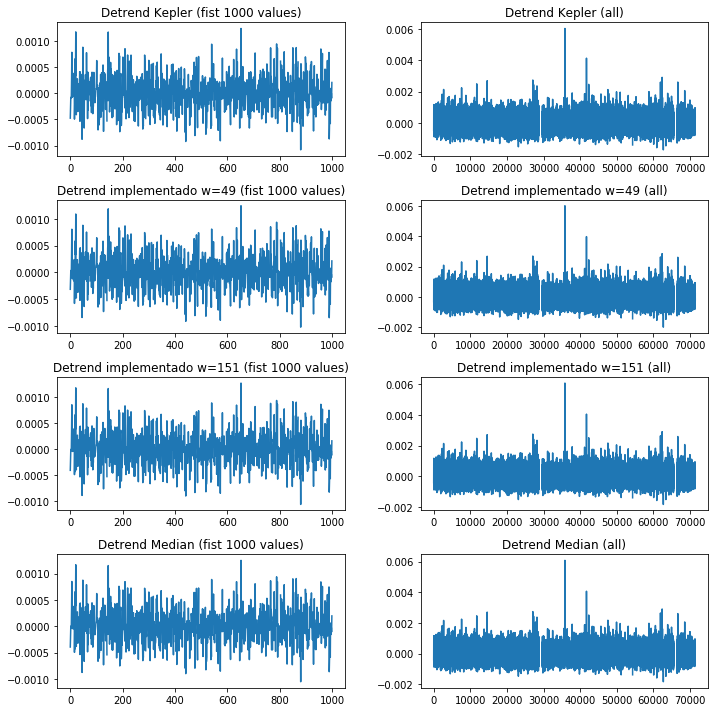

UNA CURVA DE LUZ


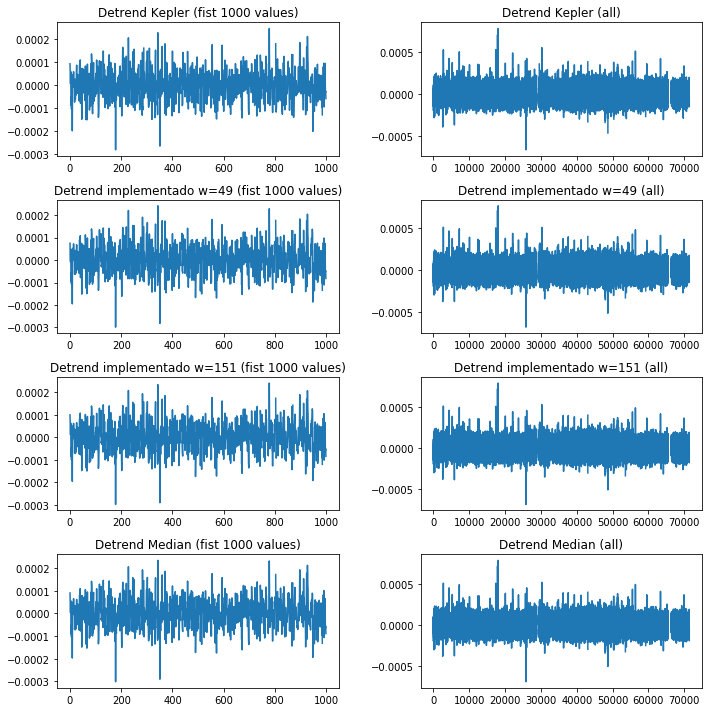

UNA CURVA DE LUZ


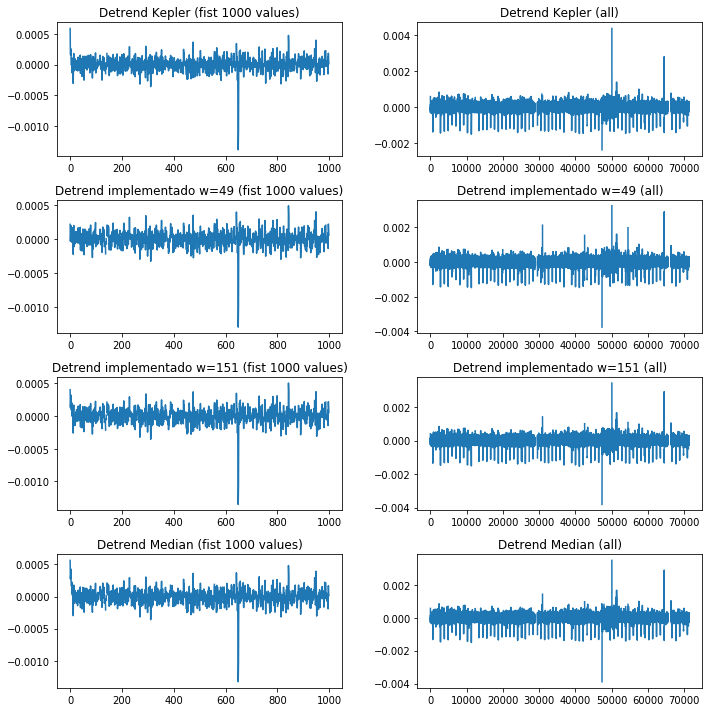

UNA CURVA DE LUZ


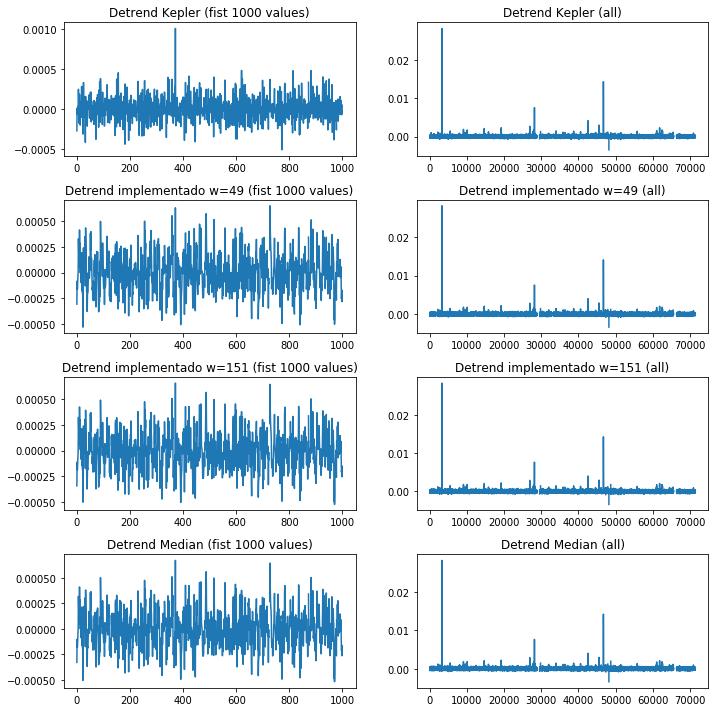

In [26]:
p_n = 1000
for i in range(len(fits_available)):
    print("UNA CURVA DE LUZ")
    hdulist = fits.open(folder+fits_available[i])
    data = hdulist[1].data
    lc_init = data.field("LC_INIT")
    lc_detrend = data.field("LC_DETREND")
    
    plt.figure(figsize=(10,10))    
    
    plt.subplot(4, 2, 1)
    plt.plot(lc_detrend[:p_n])
    plt.title("Detrend Kepler (fist 1000 values)")

    plt.subplot(4, 2, 2)
    plt.plot(lc_detrend)
    plt.title("Detrend Kepler (all)")

    final_lc = clean_LC(lc_init, kernel_median=25, kernel_pol=49, plot=False) 
    plt.subplot(4, 2, 3)
    plt.plot(final_lc[:p_n])
    plt.title("Detrend implementado w=49 (fist 1000 values)")

    plt.subplot(4, 2, 4)
    plt.plot(final_lc)
    plt.title("Detrend implementado w=49 (all)")
    
    final_lc = clean_LC(lc_init, kernel_median=25, kernel_pol=151, plot=False) 
    plt.subplot(4, 2, 5)
    plt.plot(final_lc[:p_n])
    plt.title("Detrend implementado w=151 (fist 1000 values)")

    plt.subplot(4, 2, 6)
    plt.plot(final_lc)
    plt.title("Detrend implementado w=151 (all)")
    
    final_lc = clean_LC(lc_init, kernel_median=25, detrend_median=True) 
    plt.subplot(4, 2, 7)
    plt.plot(final_lc[:p_n])
    plt.title("Detrend Median (fist 1000 values)")

    plt.subplot(4, 2, 8)
    plt.plot(final_lc)
    plt.title("Detrend Median (all)")

    plt.tight_layout()
    plt.show()

UNA CURVA DE LUZ


/home/fmena/anaconda2/envs/py3/lib/python3.5/site-packages/numpy/lib/function_base.py:4016: RuntimeWarning: All-NaN slice encountered
  r = func(a, **kwargs)
/home/fmena/anaconda2/envs/py3/lib/python3.5/site-packages/ipykernel/__main__.py:17: RuntimeWarning: invalid value encountered in less
/home/fmena/anaconda2/envs/py3/lib/python3.5/site-packages/ipykernel/__main__.py:17: RuntimeWarning: invalid value encountered in greater


Clean done (remove outliers iterativetly), erase 366 values
Clean done (remove outliers iterativetly), erase 152 values
Clean done (remove outliers iterativetly), erase 1359 values


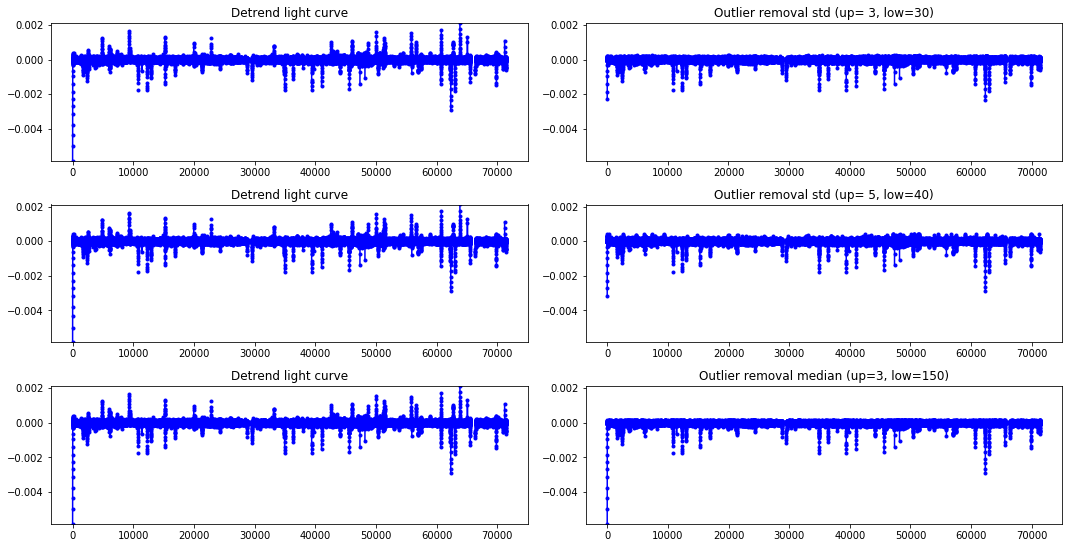

UNA CURVA DE LUZ
Clean done (remove outliers iterativetly), erase 1 values
Clean done (remove outliers iterativetly), erase 1 values
Clean done (remove outliers iterativetly), erase 960 values


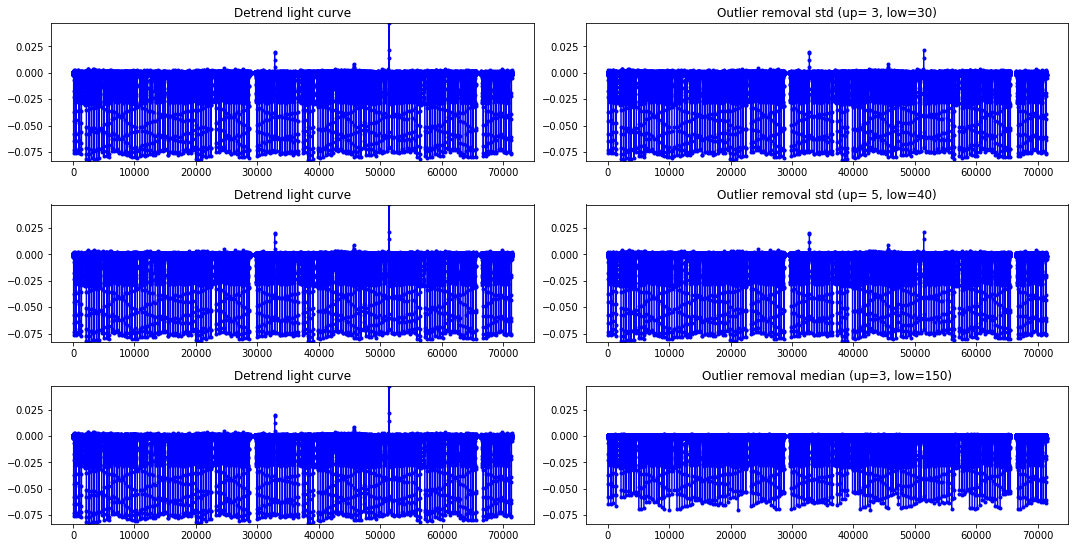

UNA CURVA DE LUZ
Clean done (remove outliers iterativetly), erase 359 values
Clean done (remove outliers iterativetly), erase 16 values
Clean done (remove outliers iterativetly), erase 481 values


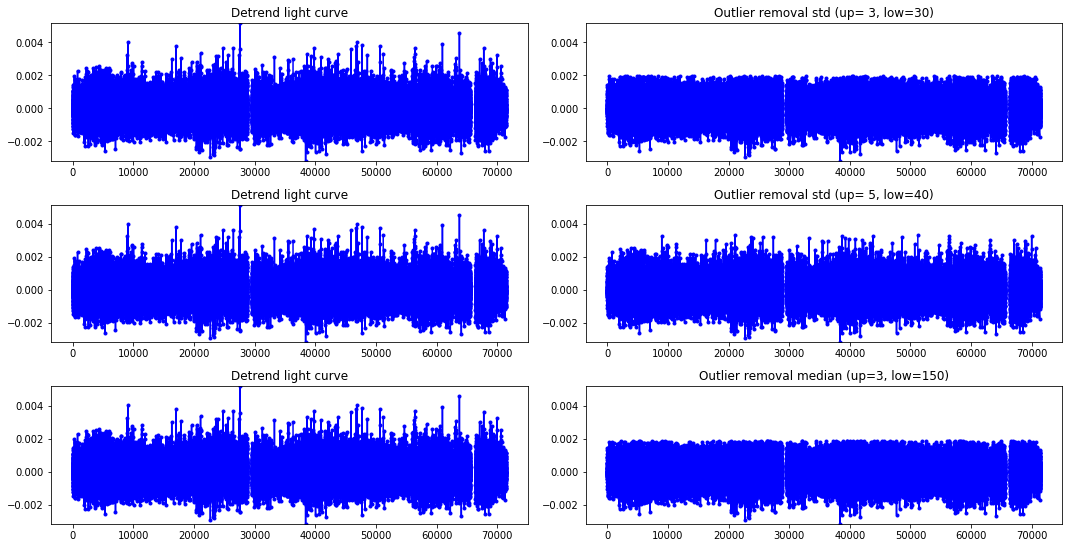

UNA CURVA DE LUZ
Clean done (remove outliers iterativetly), erase 375 values
Clean done (remove outliers iterativetly), erase 33 values
Clean done (remove outliers iterativetly), erase 478 values


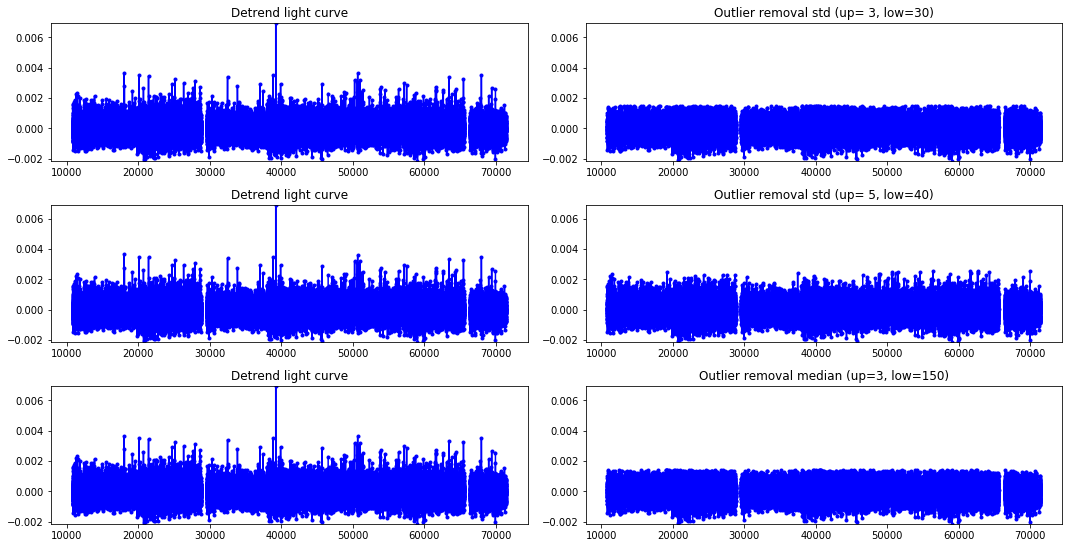

UNA CURVA DE LUZ
Clean done (remove outliers iterativetly), erase 8 values
Clean done (remove outliers iterativetly), erase 3 values
Clean done (remove outliers iterativetly), erase 475 values


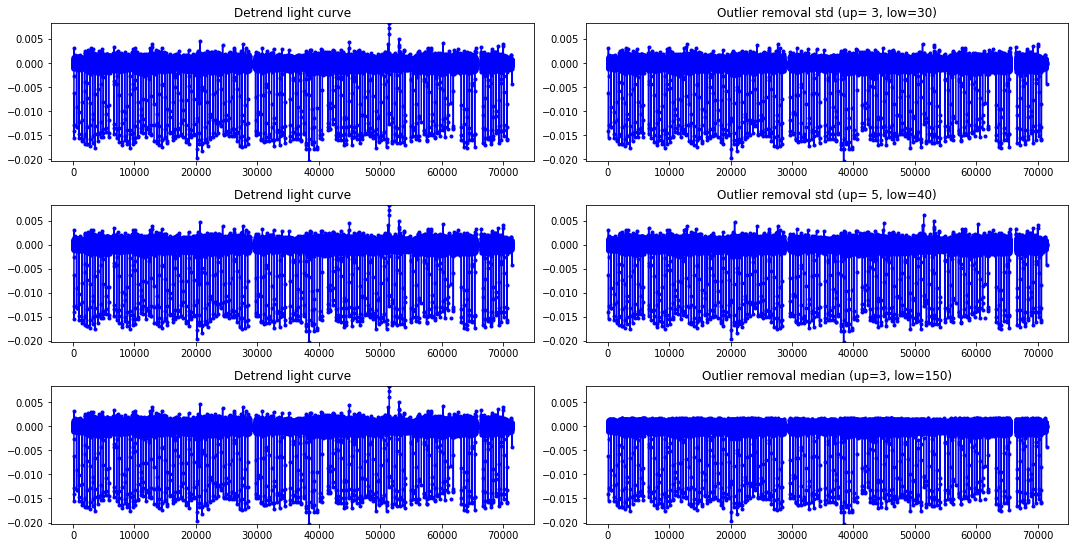

UNA CURVA DE LUZ
Clean done (remove outliers iterativetly), erase 398 values
Clean done (remove outliers iterativetly), erase 0 values
Clean done (remove outliers iterativetly), erase 515 values


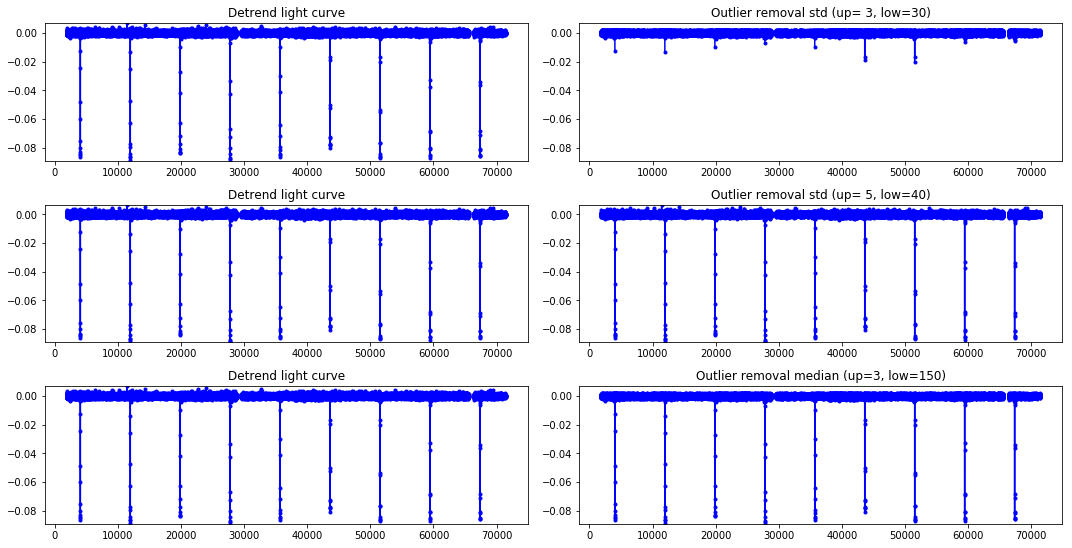

UNA CURVA DE LUZ
Clean done (remove outliers iterativetly), erase 157 values
Clean done (remove outliers iterativetly), erase 36 values
Clean done (remove outliers iterativetly), erase 932 values


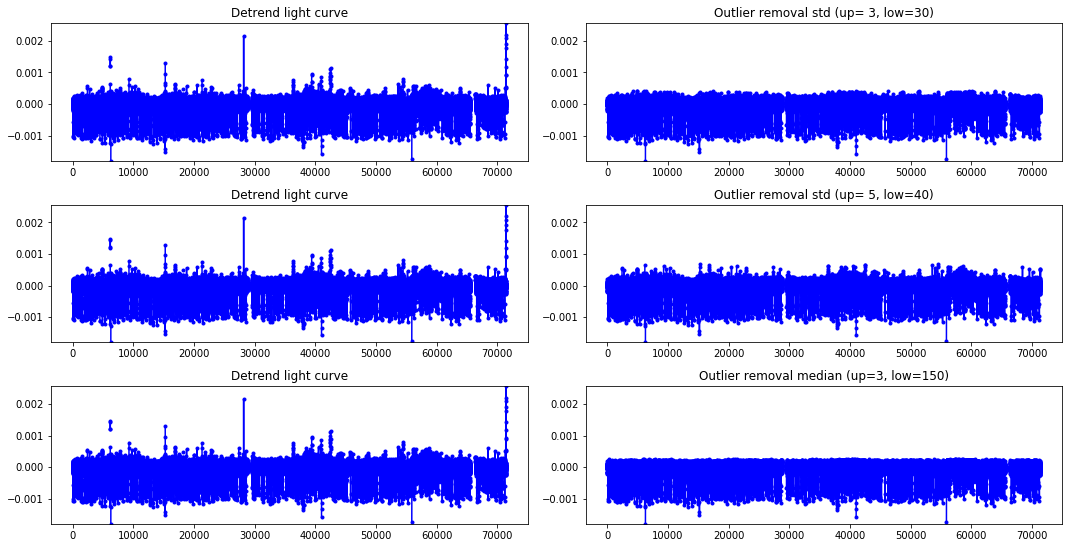

UNA CURVA DE LUZ
Clean done (remove outliers iterativetly), erase 362 values
Clean done (remove outliers iterativetly), erase 26 values
Clean done (remove outliers iterativetly), erase 465 values


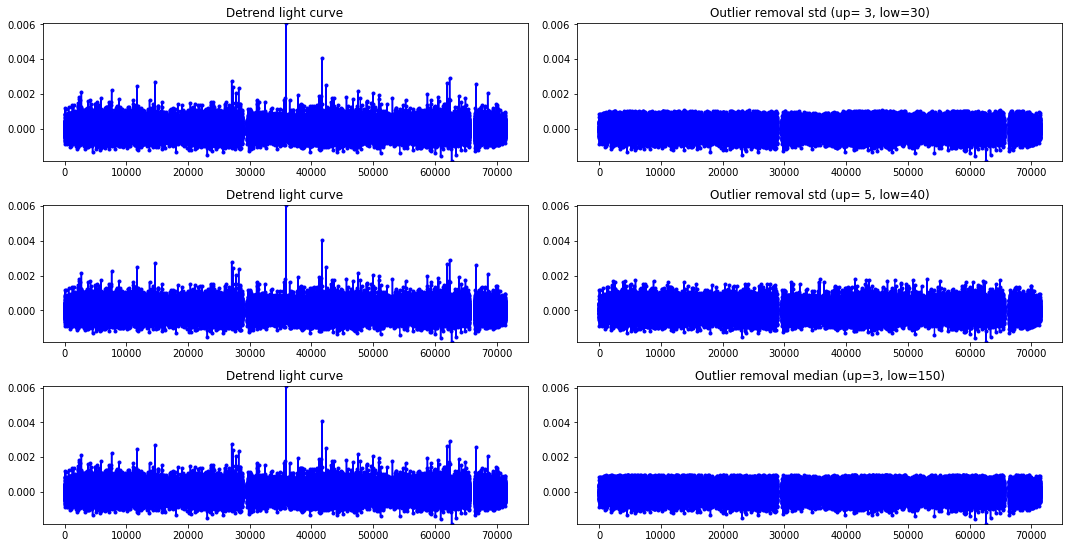

UNA CURVA DE LUZ
Clean done (remove outliers iterativetly), erase 224 values
Clean done (remove outliers iterativetly), erase 29 values
Clean done (remove outliers iterativetly), erase 307 values


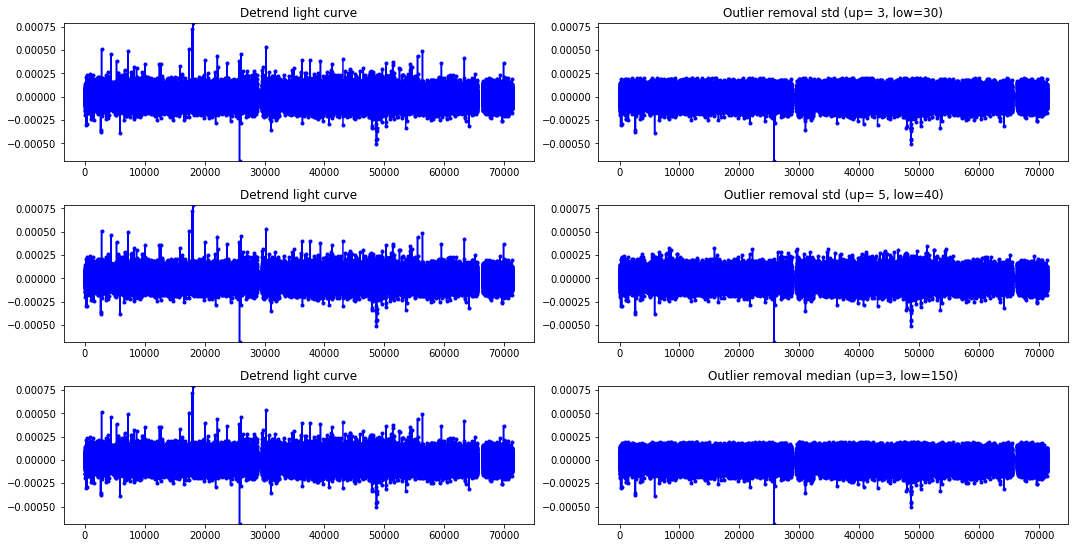

UNA CURVA DE LUZ
Clean done (remove outliers iterativetly), erase 383 values
Clean done (remove outliers iterativetly), erase 53 values
Clean done (remove outliers iterativetly), erase 704 values


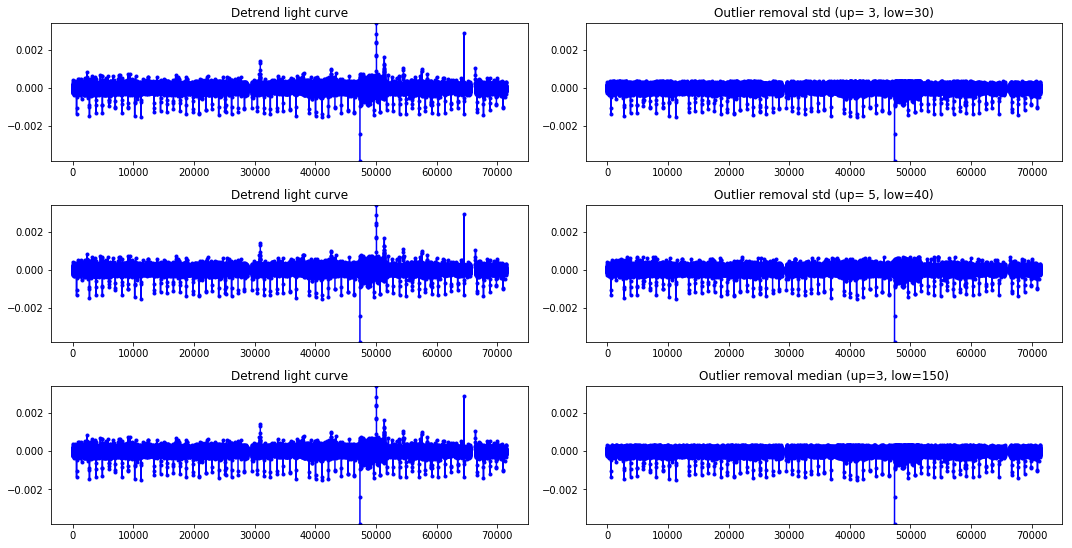

UNA CURVA DE LUZ
Clean done (remove outliers iterativetly), erase 273 values
Clean done (remove outliers iterativetly), erase 47 values
Clean done (remove outliers iterativetly), erase 319 values


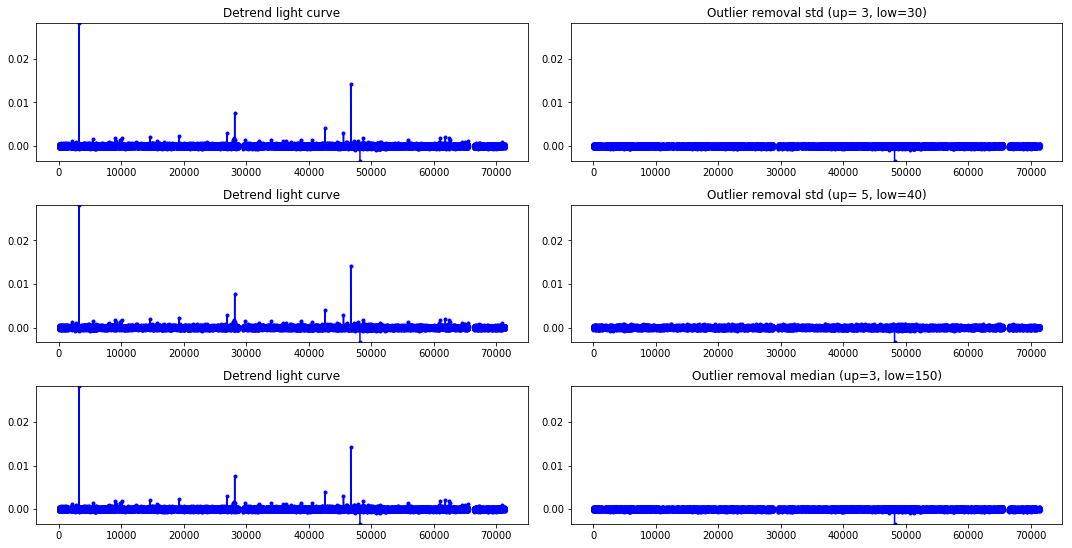

In [54]:
p_n = 1000
for i in range(len(fits_available)):
    print("UNA CURVA DE LUZ")
    hdulist = fits.open(folder+fits_available[i])
    data = hdulist[1].data
    lc_init = data.field("LC_INIT")
    
    final_lc = clean_LC(lc_init, kernel_median=25, kernel_pol=151, plot=False) 
    y0 = np.nanmin(final_lc)
    y1 = np.nanmax(final_lc)    
    plt.figure(figsize=(15,10))    
        
    plt.subplot(4, 2, 1)
    plt.plot(final_lc,'b.-')
    plt.title("Detrend light curve")
    plt.ylim(y0,y1)
    
    #outlier removal
    #lc_out_rm = remove_outliers(final_lc, 100,with_MAD=True)
    
    lc_out_rm = remove_outliers(final_lc, sigm_up = 3, sigm_low= 30, with_MAD=False) #o 5 sigma up
    plt.subplot(4, 2, 2)
    plt.plot(lc_out_rm,'b.-')
    plt.title("Outlier removal std (up= 3, low=30)")
    plt.ylim(y0,y1)
    
    plt.subplot(4, 2, 3)
    plt.plot(final_lc,'b.-')
    plt.title("Detrend light curve")
    plt.ylim(y0,y1)
    
    lc_out_rm = remove_outliers(final_lc, sigm_up = 5, sigm_low= 40, with_MAD=False)
    plt.subplot(4, 2, 4)
    plt.plot(lc_out_rm,'b.-')
    plt.title("Outlier removal std (up= 5, low=40)")
    plt.ylim(y0,y1)
    
    #
    plt.subplot(4, 2, 5)
    plt.plot(final_lc,'b.-')
    plt.title("Detrend light curve")
    plt.ylim(y0,y1)
    
    lc_out_rm = remove_outliers(final_lc, sigm_up = 3, sigm_low= 150, with_MAD=True)
    plt.subplot(4, 2, 6)
    plt.plot(lc_out_rm,'b.-')
    plt.title("Outlier removal median (up=3, low=150)")
    plt.ylim(y0,y1)
    
    plt.tight_layout()
    plt.show()

In [3]:
dirpath = os.getcwd().split("code")[0]+"code/"
sys.path.append(dirpath)
from pre_process import clean_LC,generate_representation
import numpy as np

folder_lc = "/work/work_teamEXOPLANET/KOI_LC/"

## load data
time_kepler = np.load(folder_lc+"npy/KOI_LC_time.npy")
lc_kepler = np.load(folder_lc+"npy/KOI_LC_init.npy" )
lc_kepler_det = np.load(folder_lc+'npy/KOI_LC_detrend.npy')
lc_kepler_whit = np.load(folder_lc+'npy/KOI_LC_white.npy')

N, T = lc_kepler.shape
print((N,T))

(8054, 71427)


In [4]:
###### NEW #########
dirpath = os.getcwd().split("code")[0]+"code/obj4"
sys.path.append(dirpath)
from fold import *
import pandas as pd

def global_fold(t, fluxs, per, t0, T=1000):
    t_fold, val_fold = phase_fold_and_sort_light_curve(t, fluxs, period= per, t0= t0)
    return global_view(t_fold, val_fold, period=per, num_bins=T, bin_width_factor=1 / T)

df= pd.read_csv("../KOI_Data/kepler_dataset.csv")
df.head()

Kepler ID   KOI Name  Kepler Name  KOI Number Kepler Disposition  \
0     757450  K00889.01  Kepler-75 b      889.01          CANDIDATE   
1     892772  K01009.01          NaN     1009.01     FALSE POSITIVE   
2    1025986  K07621.01          NaN     7621.01     FALSE POSITIVE   
3    1026032  K06252.01          NaN     6252.01     FALSE POSITIVE   
4    1026957  K00958.01          NaN      958.01          CANDIDATE   

  NExScI Disposition    RA (J2000)  RA Error   Dec (J2000)  Dec Error  ...  \
0          CONFIRMED  19 24 33.024       0.0  +36 34 38.57        0.0  ...   
1     FALSE POSITIVE  19 24 36.811       0.0  +36 40 43.83        0.0  ...   
2     FALSE POSITIVE  19 24 08.086       0.0  +36 46 15.75        0.0  ...   
3     FALSE POSITIVE  19 24 10.577       0.0  +36 43 45.38        0.0  ...   
4          CANDIDATE  19 25 01.078       0.0  +36 44 37.00        0.0  ...   

   Contamination Flag  Insolation Flux  Insolation Flux err1  \
0                   0            83.21                 16.69   
1                   0           119.70                 48.69   
2                   0             2.00                  0.92   
3                   0            98.60                 52.46   
4                   0            13.18                  3.00   

   Insolation Flux err2  Fitted Stellar Density  Fitted Stellar Density err1  \
0                -13.87                11.62061                      0.20683   
1                -36.91                 0.88510                      0.10080   
2                 -0.76                33.55994                     16.58298   
3                -21.18                 0.73874                      0.00021   
4                 -1.98               102.86534                      5.47239   

   Fitted Stellar Density err2  Planetary Fit  Disposition Score  \
0                     -0.40258        LS+MCMC              0.999   
1                     -0.39457        LS+MCMC              0.000   
2                    -31.53180        LS+MCMC              0.000   
3                     -0.00735        LS+MCMC              0.000   
4                    -30.25813        LS+MCMC              1.000   

                               File Name  
0  kplr000757450-20160128150956_dvt.fits  
1  kplr000892772-20160128150956_dvt.fits  
2  kplr001025986-20160128150956_dvt.fits  
3  kplr001026032-20160128150956_dvt.fits  
4  kplr001026957-20160128150956_dvt.fits  

[5 rows x 153 columns]

In [11]:
n = 15
n_sampleds = np.random.randint(0,len(lc_kepler), size=n)
n_sampleds

array([5696, 6067, 2292, 5230, 4386, 1702, 7516, 2124, 5800, 7704, 7751,
       4015,  894, 3085, 4199])

5696


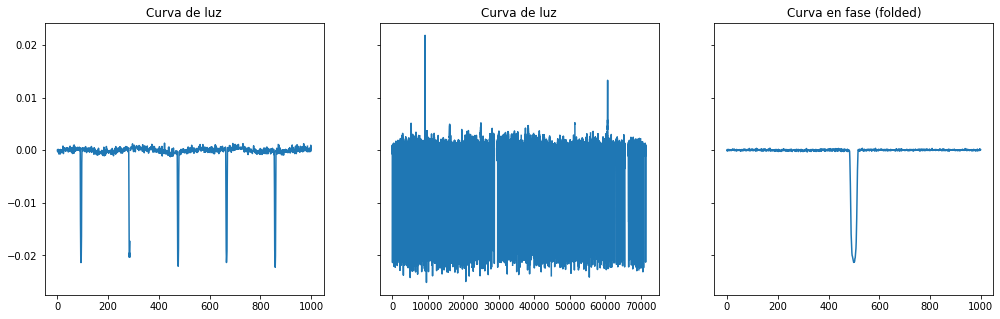

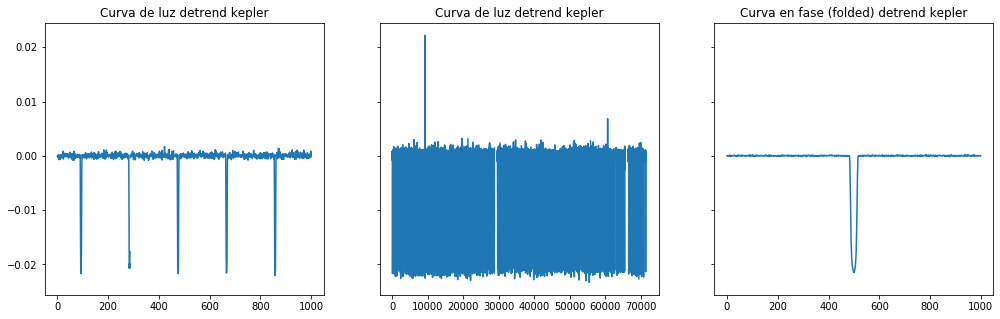

6067


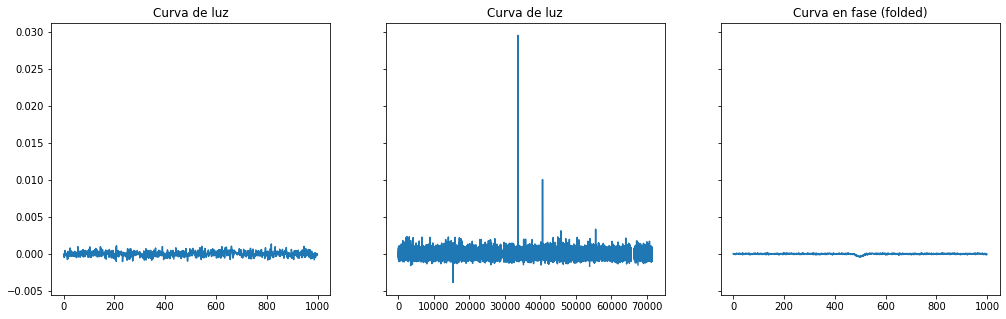

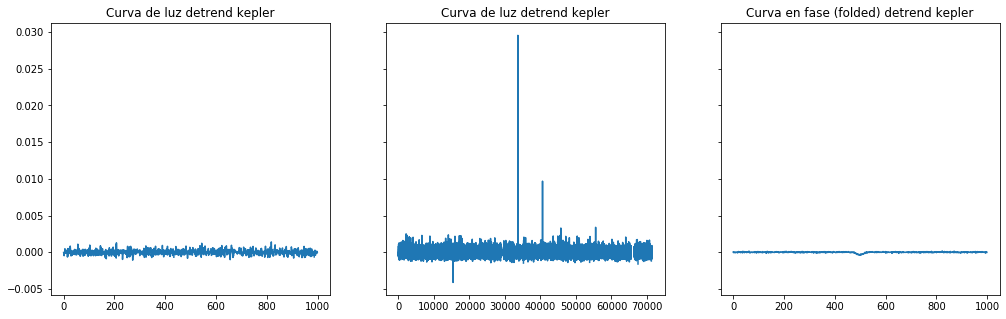

2292


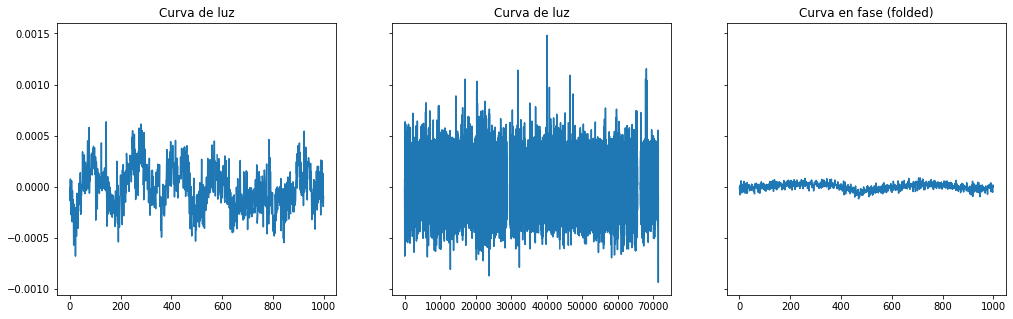

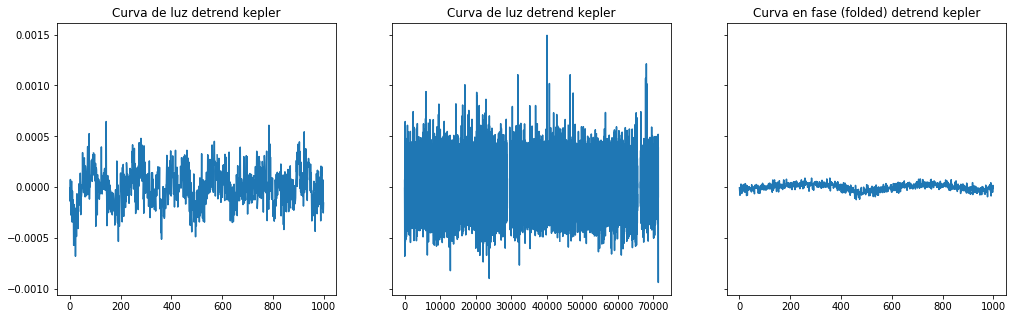

5230


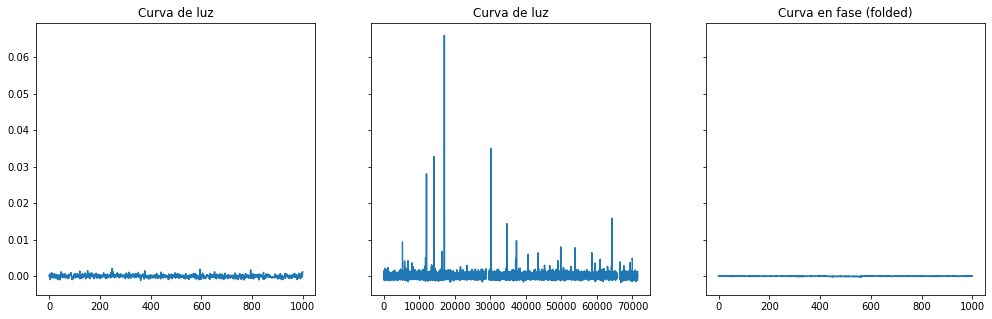

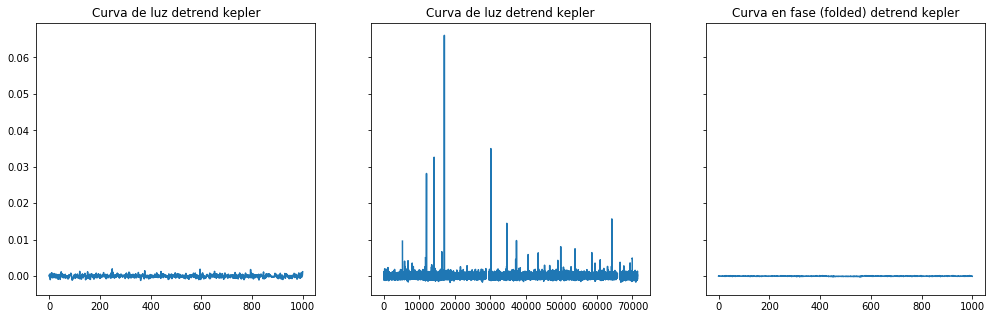

4386


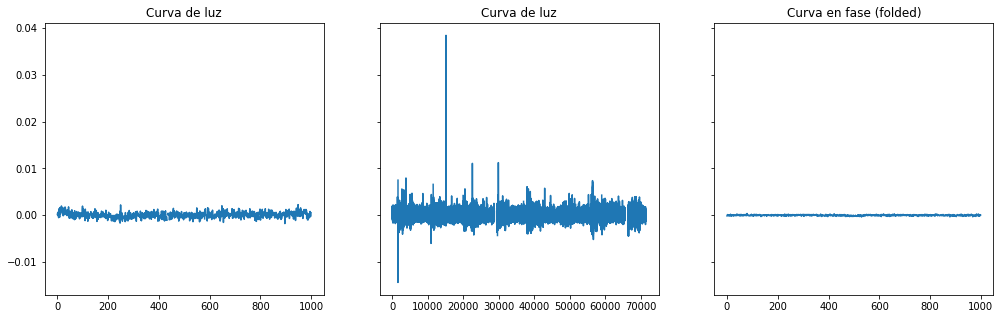

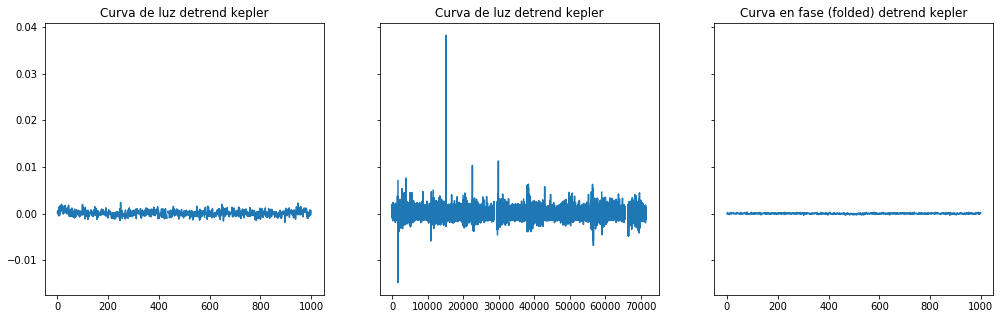

1702


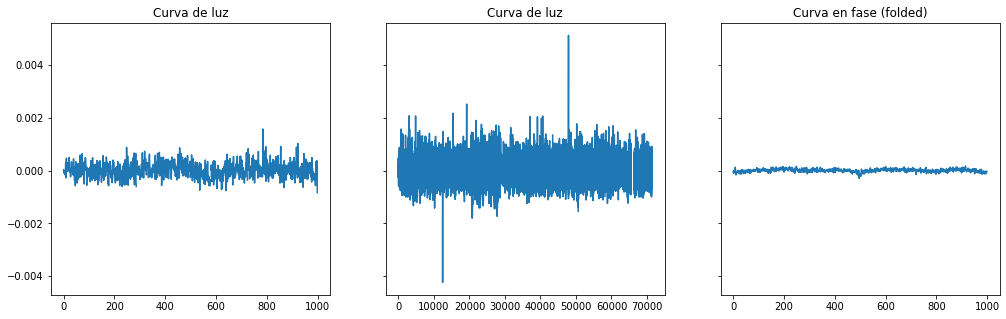

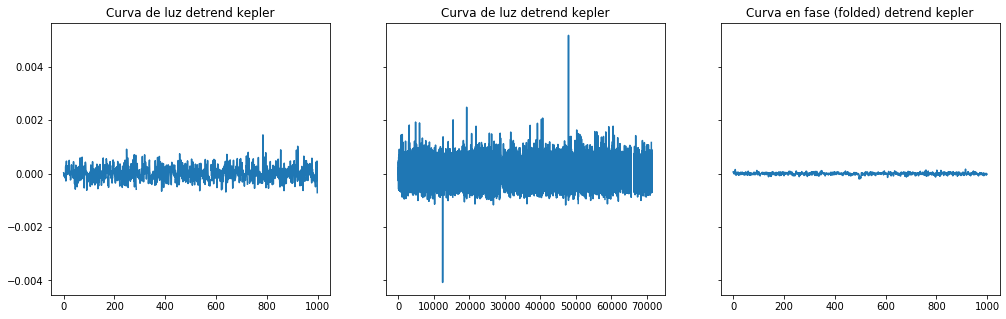

7516


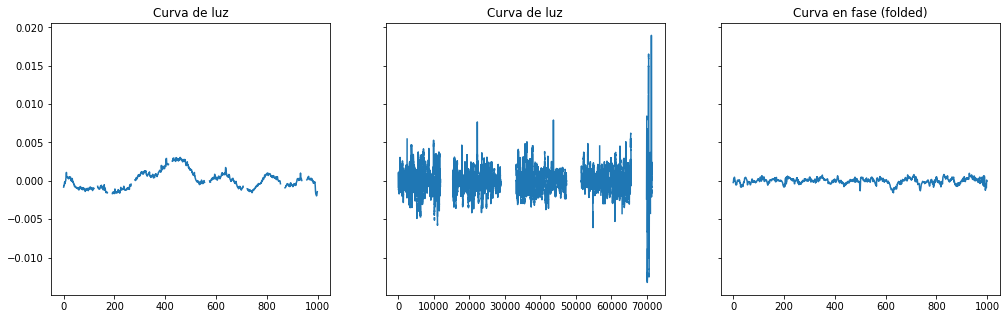

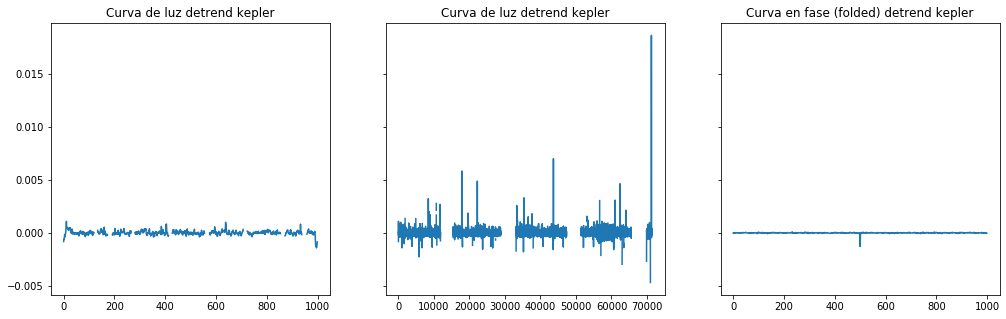

2124


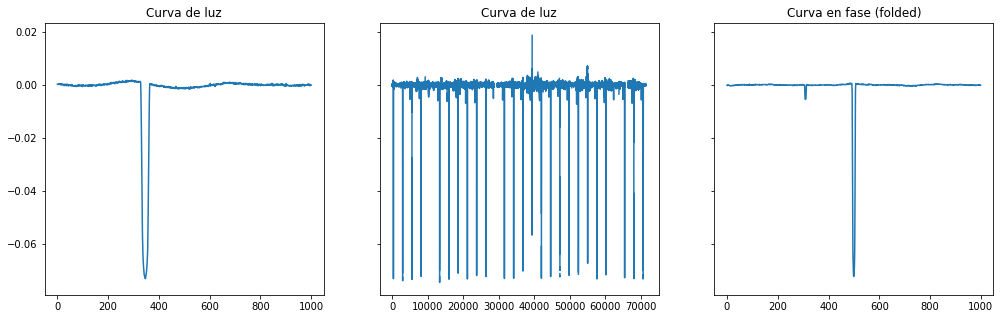

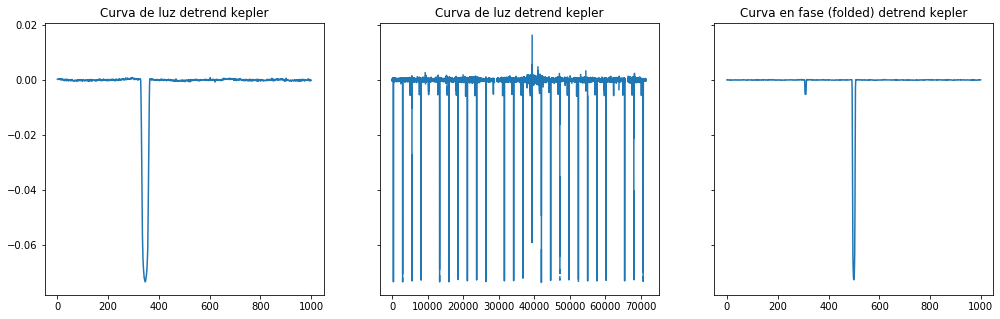

5800


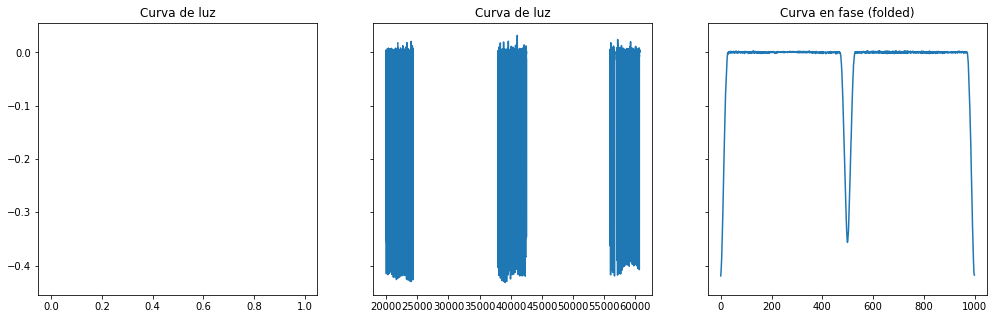

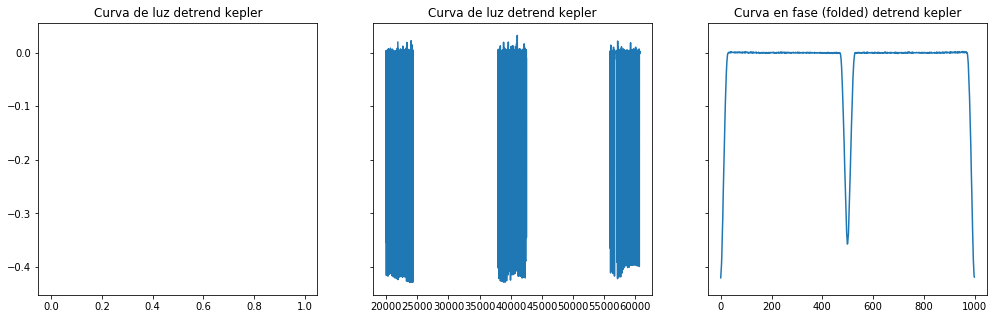

7704


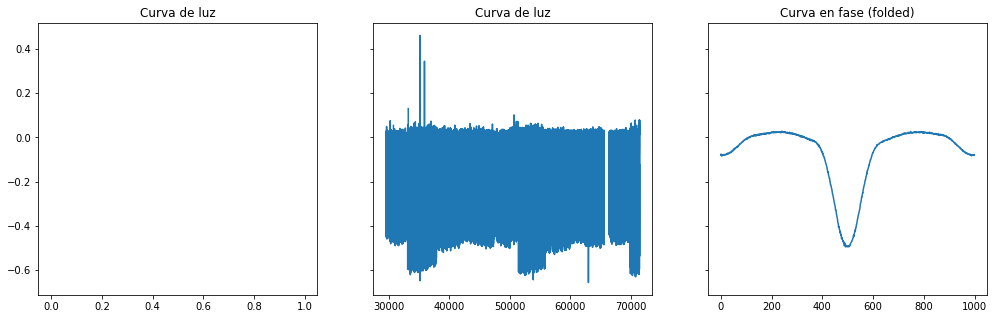

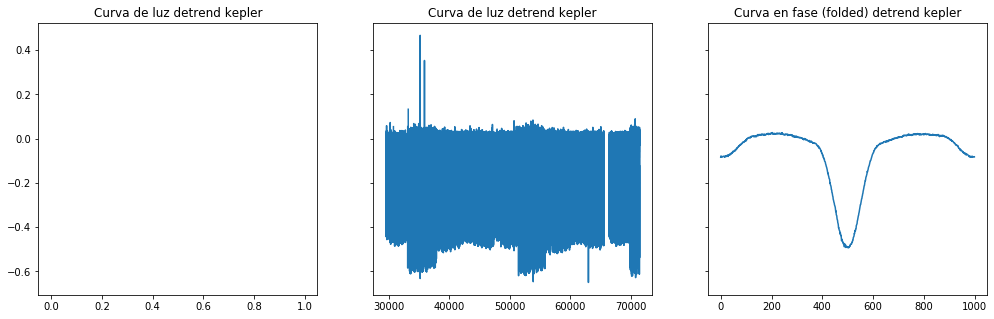

7751


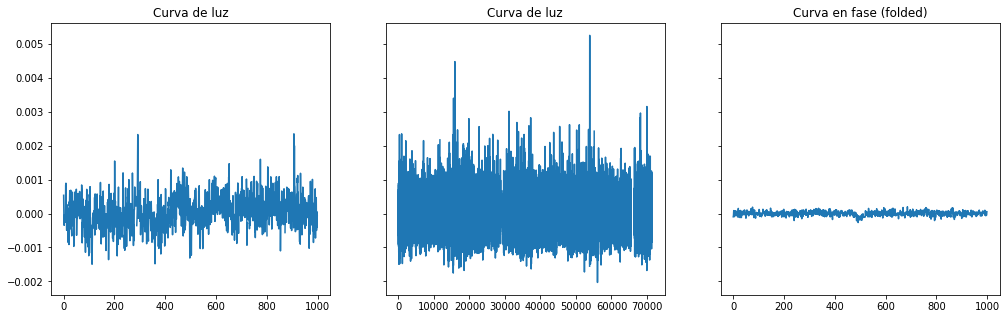

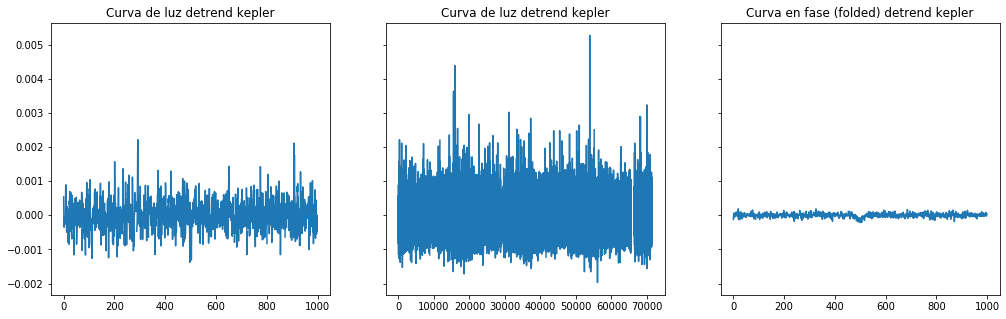

4015


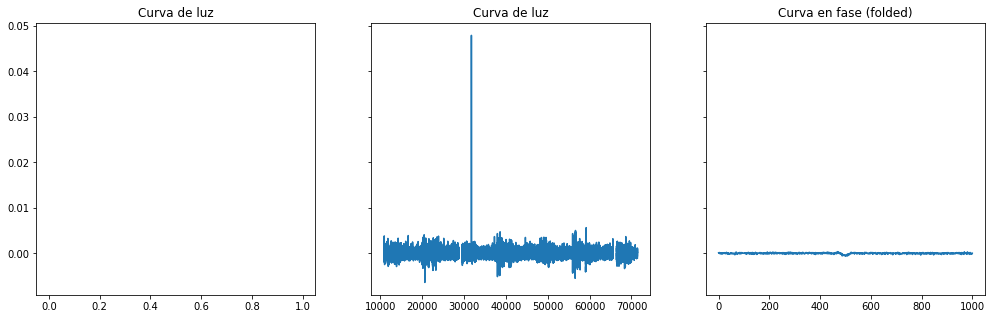

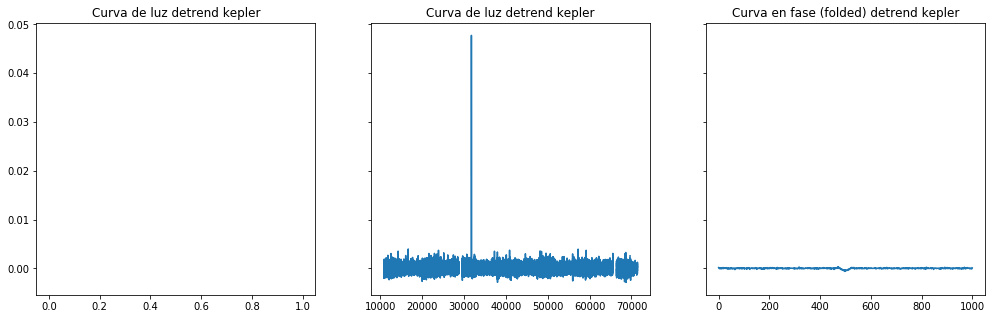

894


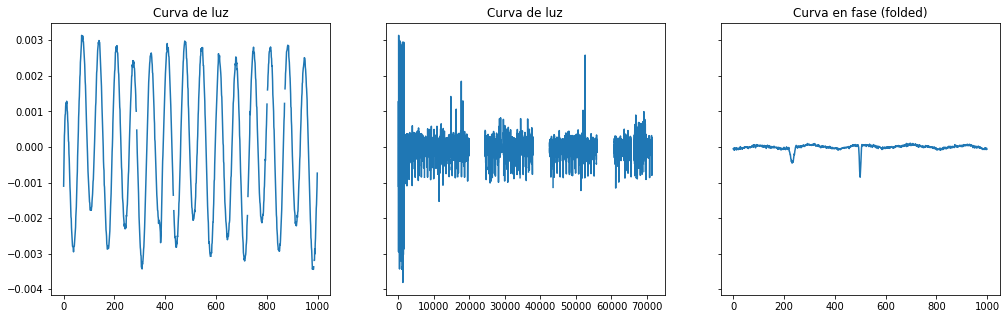

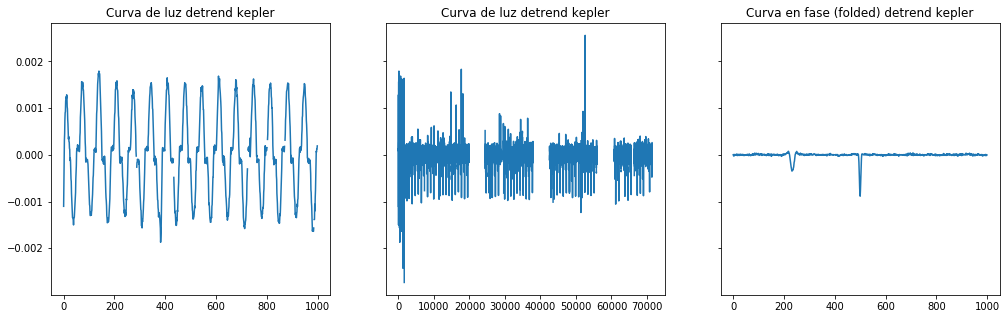

3085


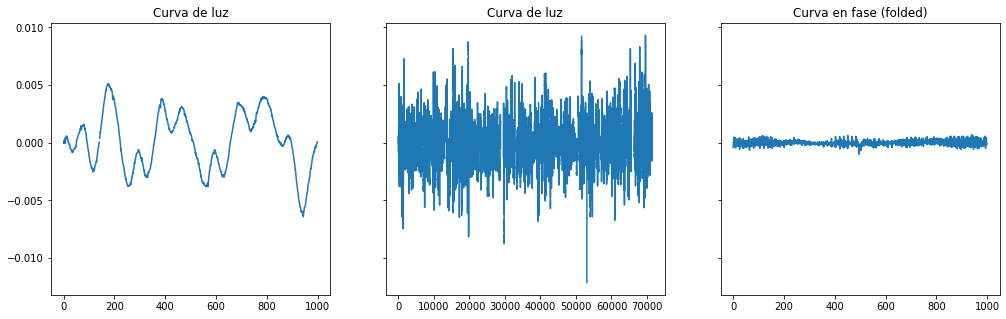

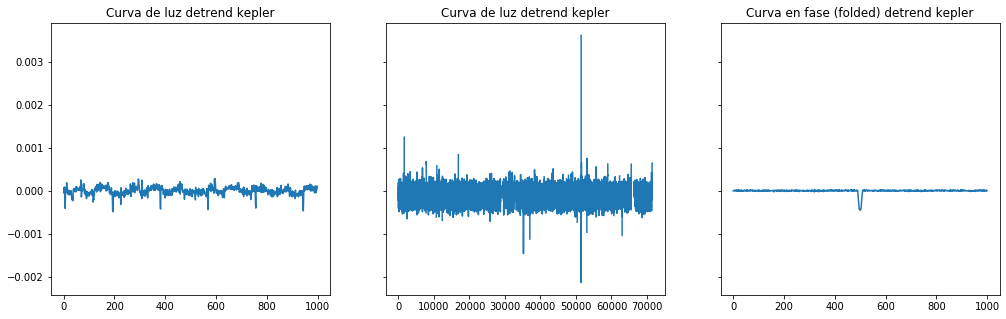

4199


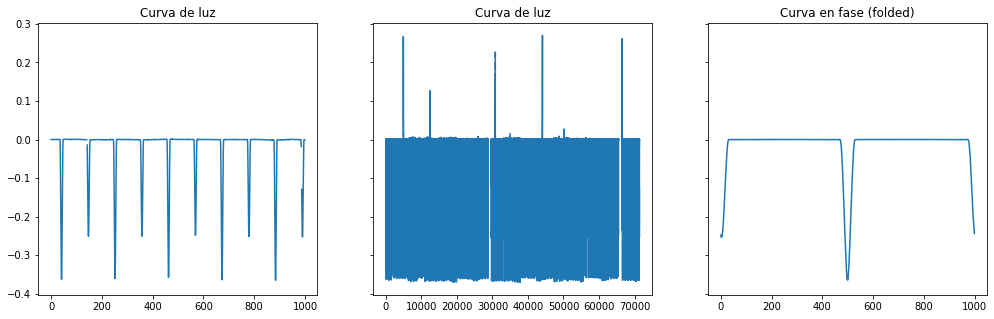

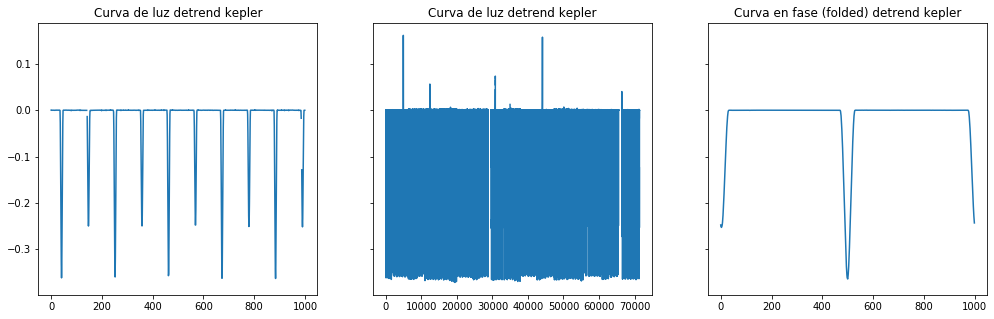

In [12]:
p_n = 1000
for n_sampled in n_sampleds:
    print(n_sampled)
    fluxs = lc_kepler[n_sampled]
    time_i = time_kepler[n_sampled]
    
    
    f, axx = plt.subplots(1, 3,figsize= (17,5),sharey=True)
    axx[0].plot(fluxs[:p_n])
    axx[0].set_title("Curva de luz")
    
    axx[1].plot(fluxs)
    axx[1].set_title("Curva de luz")
    
    per, t0 = df[["Period", "Time of Transit Epoch"]].values[n_sampled]
    mask_v = ~np.isnan(fluxs)
    f_glo = global_fold(time_i[mask_v], fluxs[mask_v], per, t0)
    axx[2].plot(f_glo)
    axx[2].set_title("Curva en fase (folded)")
    plt.show()
    
    
    fluxs = lc_kepler_det[n_sampled]
    #fluxs = lc_kepler_whit[n_sampled]
    
    f, axx = plt.subplots(1, 3,figsize= (17,5),sharey=True)
    axx[0].plot(fluxs[:p_n])
    axx[0].set_title("Curva de luz detrend kepler")
    
    axx[1].plot(fluxs)
    axx[1].set_title("Curva de luz detrend kepler")
    
    per, t0 = df[["Period", "Time of Transit Epoch"]].values[n_sampled]
    mask_v = ~np.isnan(fluxs)
    f_glo = global_fold(time_i[mask_v], fluxs[mask_v], per, t0)
    axx[2].plot(f_glo)
    axx[2].set_title("Curva en fase (folded) detrend kepler")
    plt.show()

5696


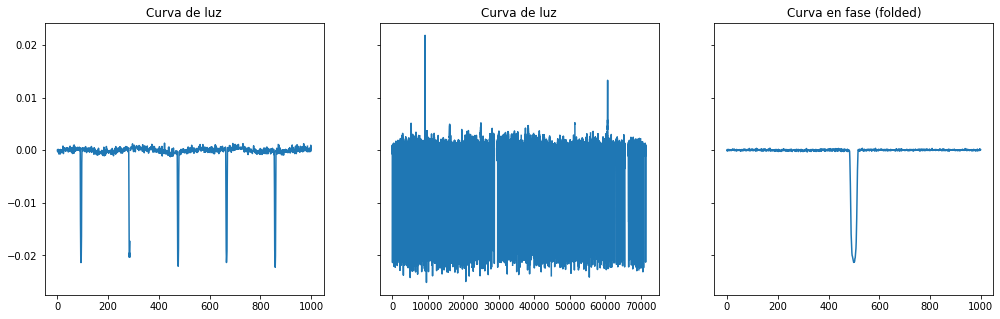

Clean done (remove outliers iterativetly), erase 1 values


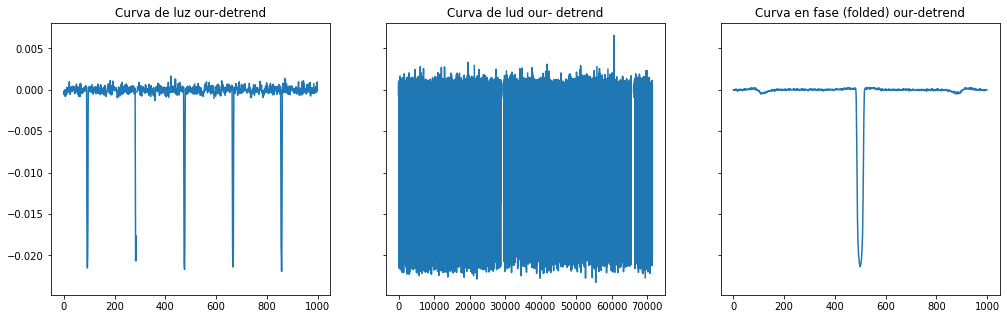

6067


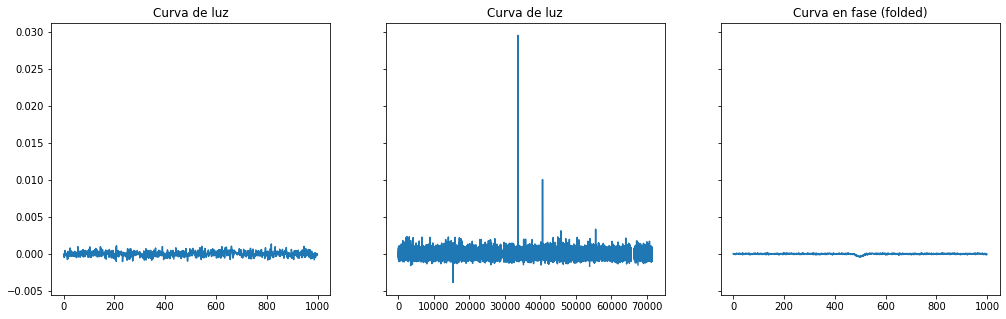

Clean done (remove outliers iterativetly), erase 37 values


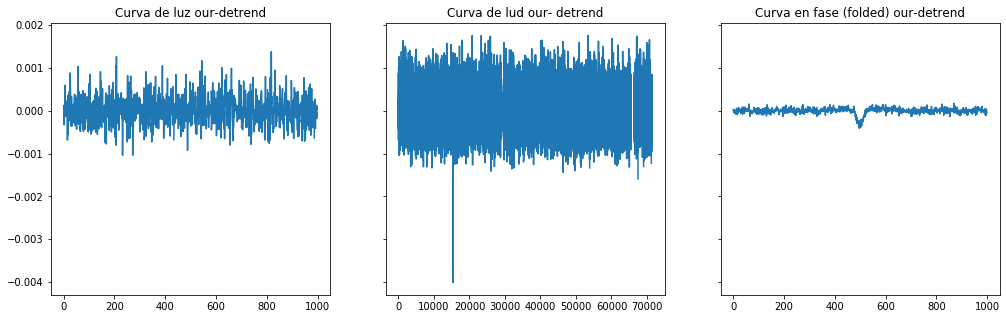

2292


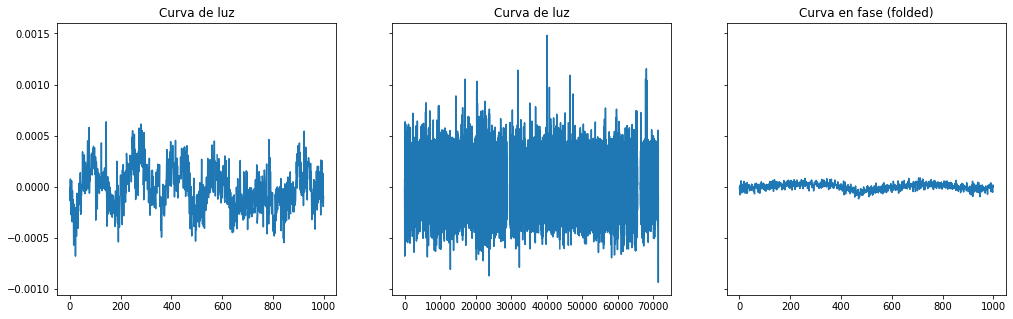

Clean done (remove outliers iterativetly), erase 26 values


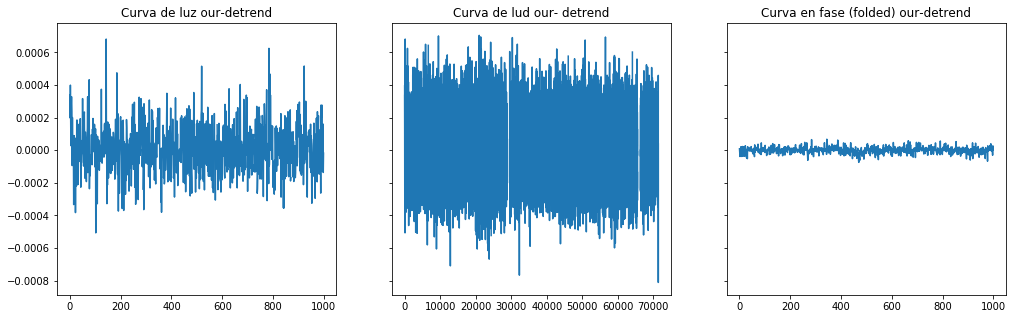

5230


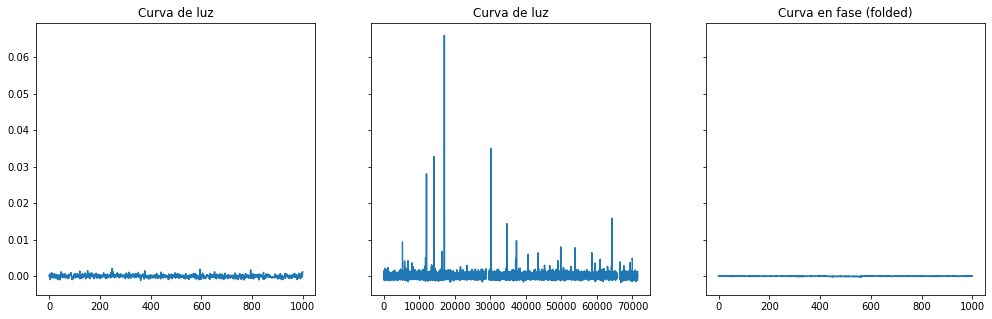

Clean done (remove outliers iterativetly), erase 71 values


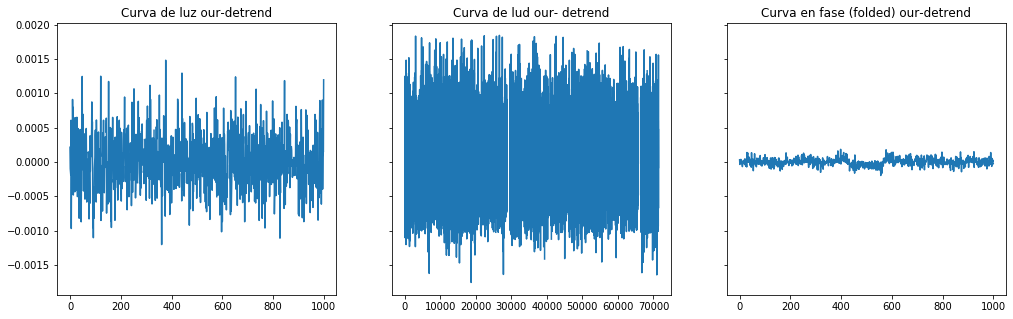

4386


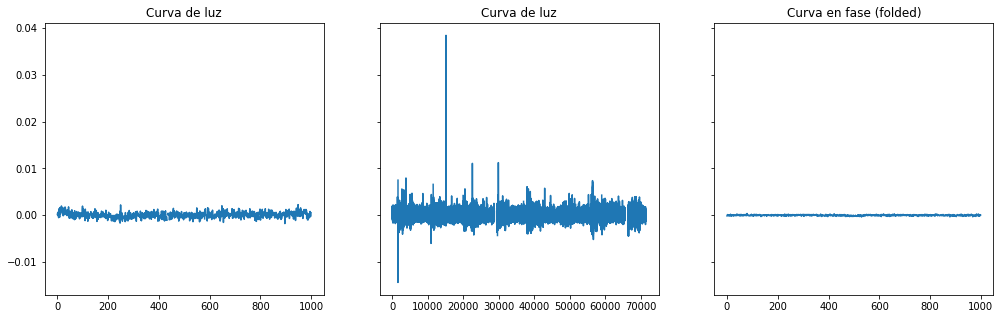

Clean done (remove outliers iterativetly), erase 39 values


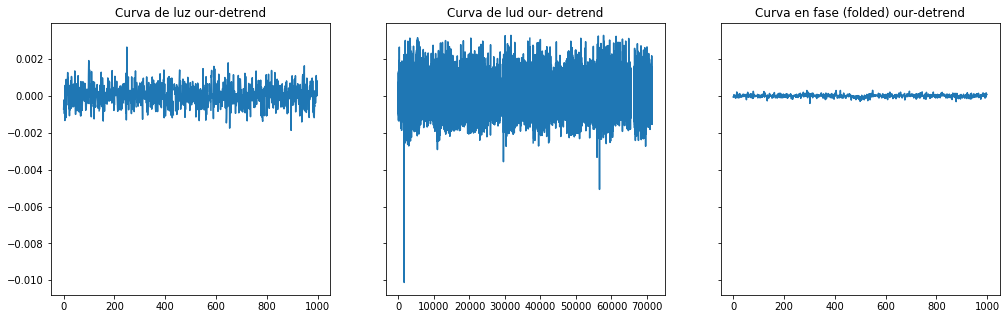

1702


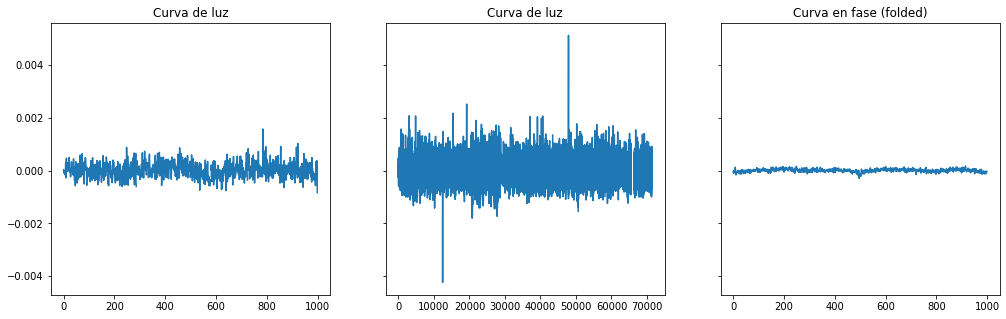

Clean done (remove outliers iterativetly), erase 28 values


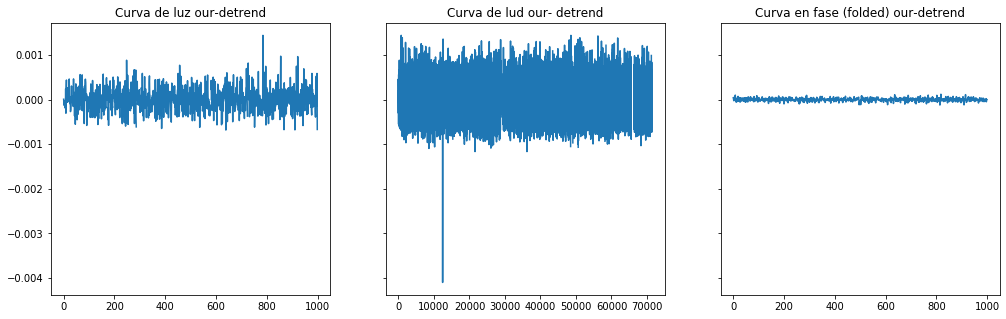

7516


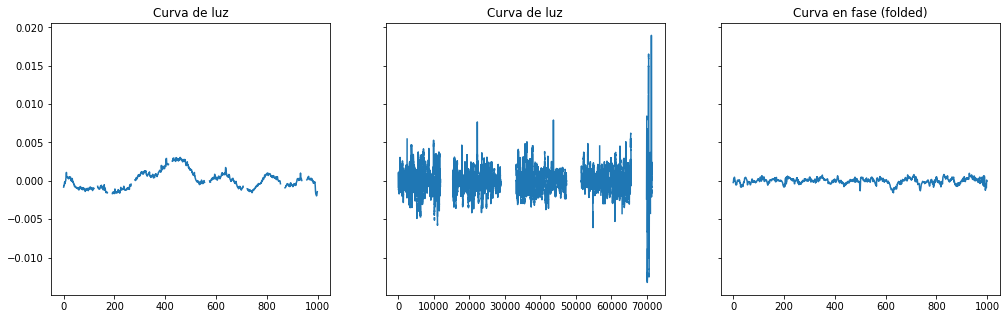

Clean done (remove outliers iterativetly), erase 96 values


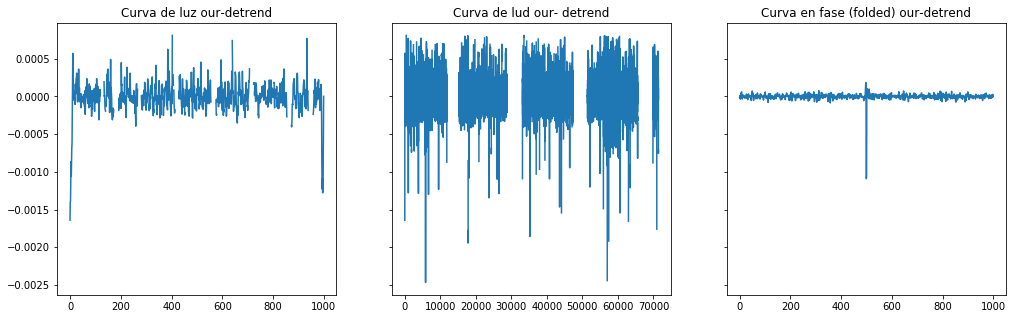

2124


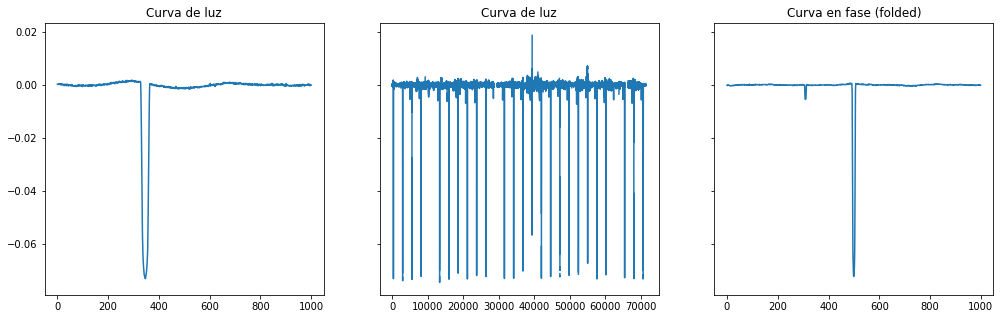

Clean done (remove outliers iterativetly), erase 464 values


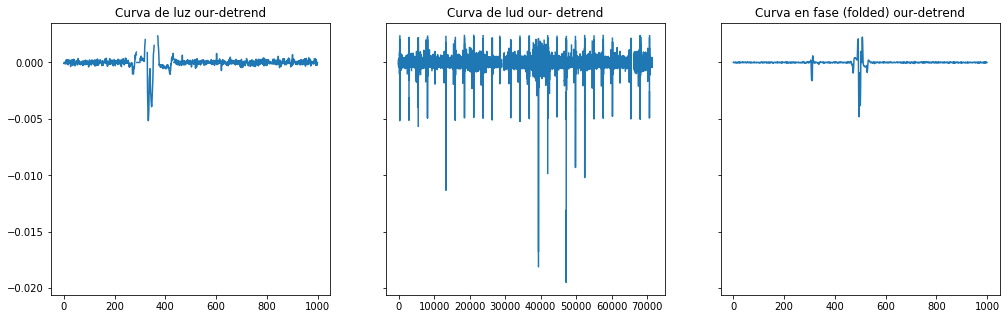

5800


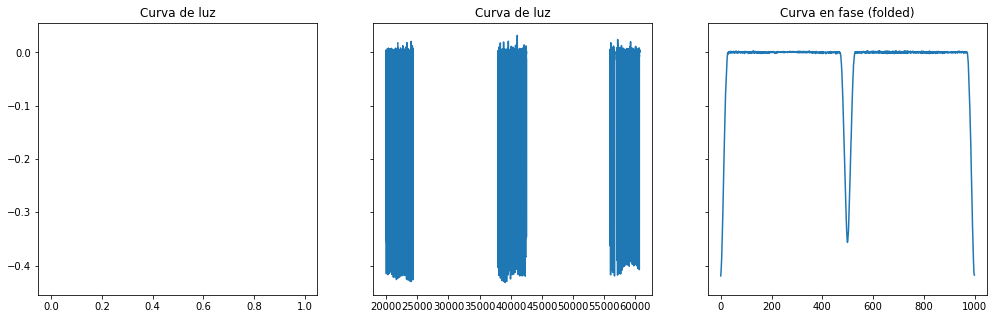

Clean done (remove outliers iterativetly), erase 0 values


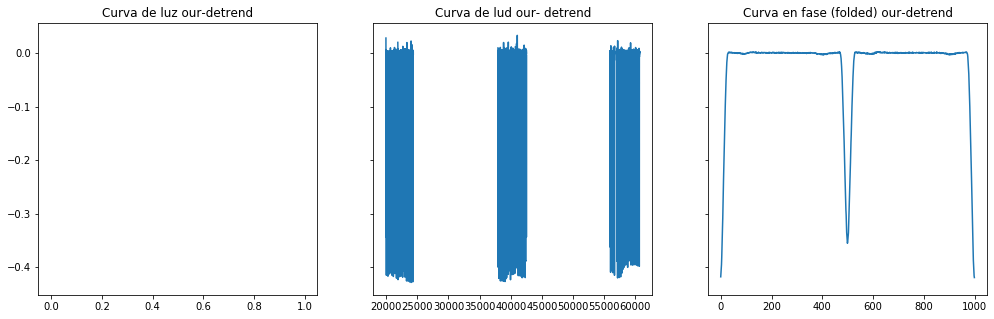

7704


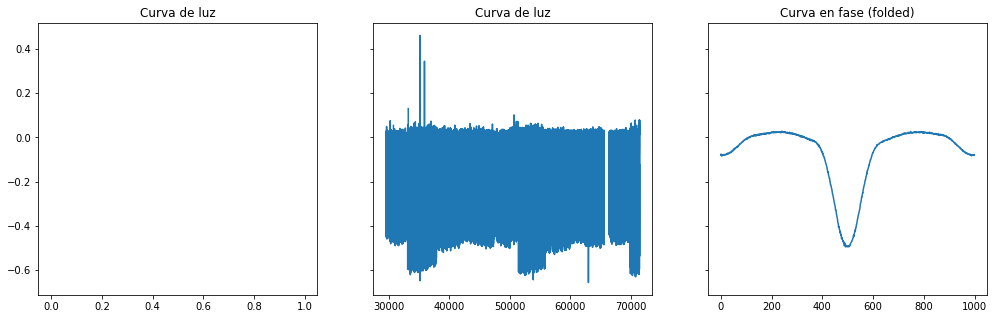

Clean done (remove outliers iterativetly), erase 0 values


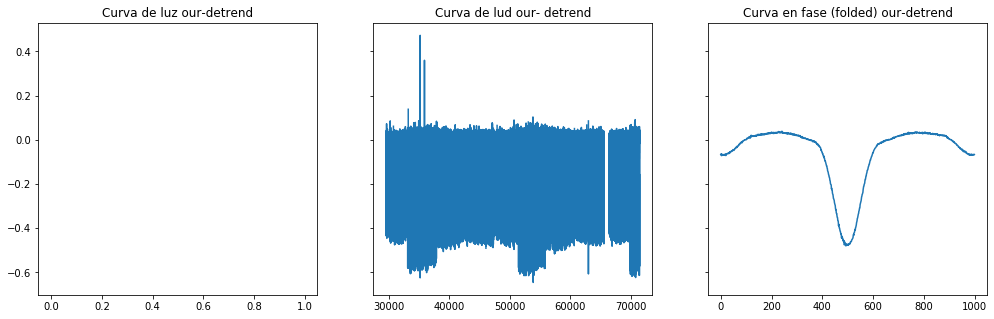

7751


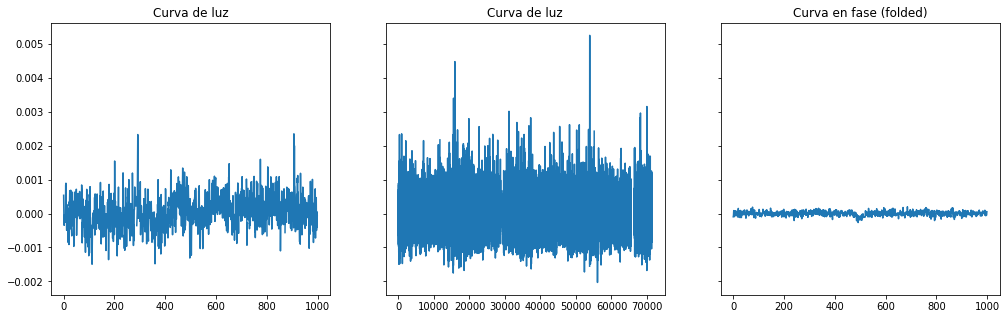

Clean done (remove outliers iterativetly), erase 37 values


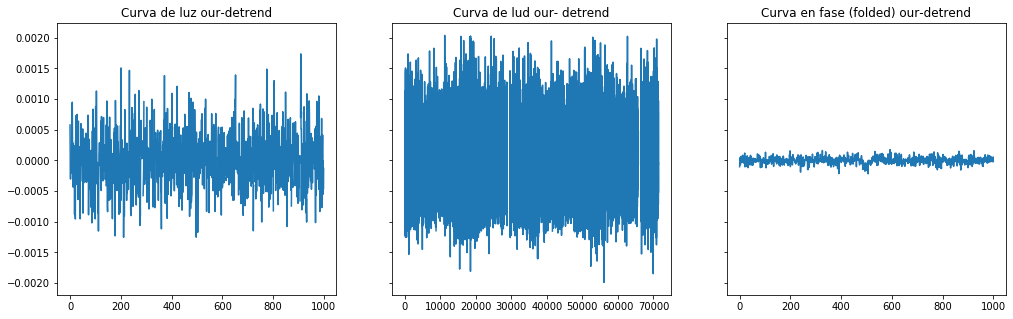

4015


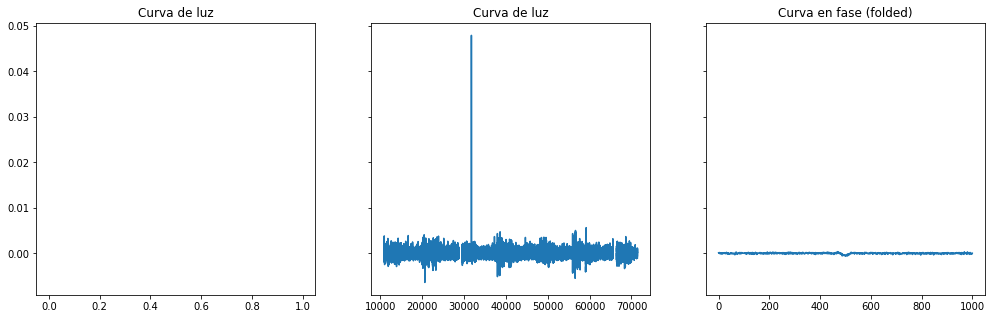

Clean done (remove outliers iterativetly), erase 25 values


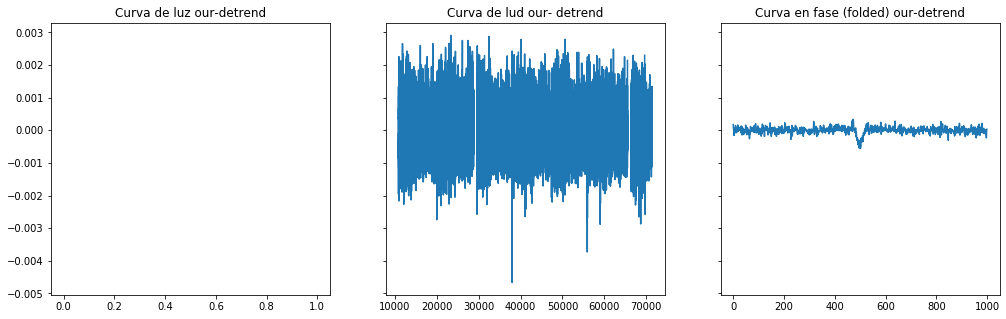

894


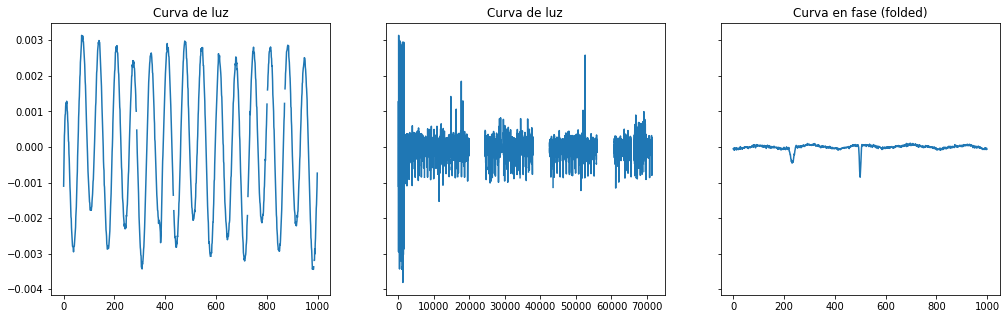

Clean done (remove outliers iterativetly), erase 154 values


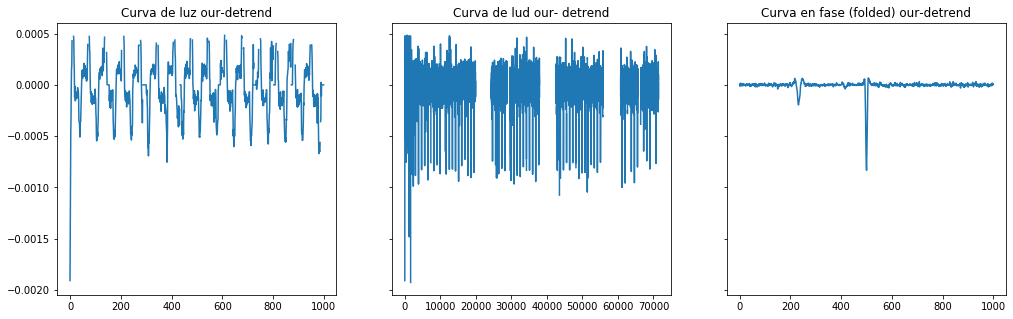

3085


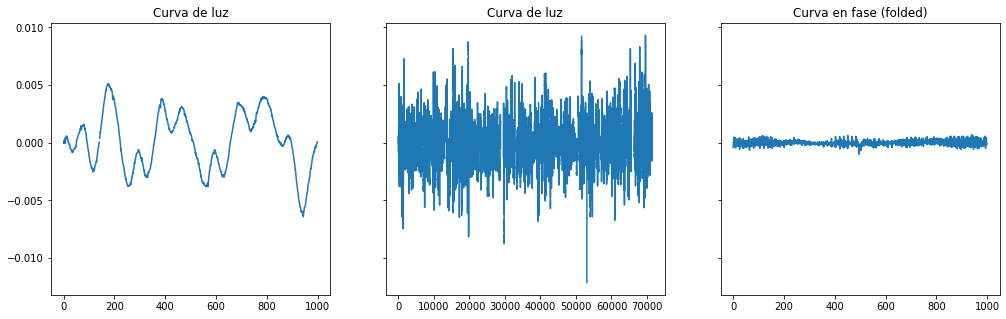

Clean done (remove outliers iterativetly), erase 83 values


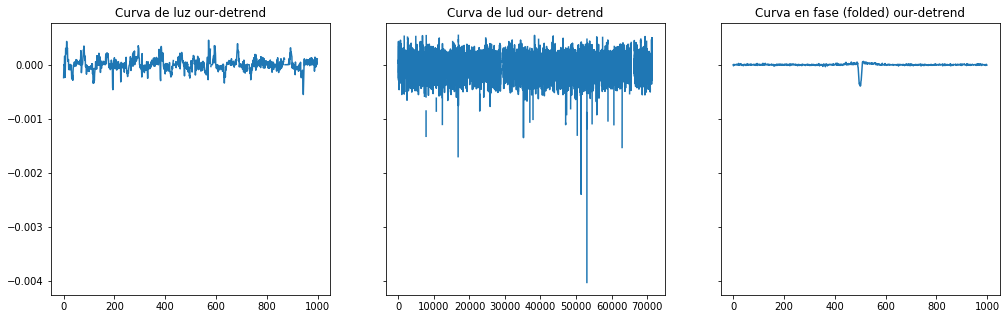

4199


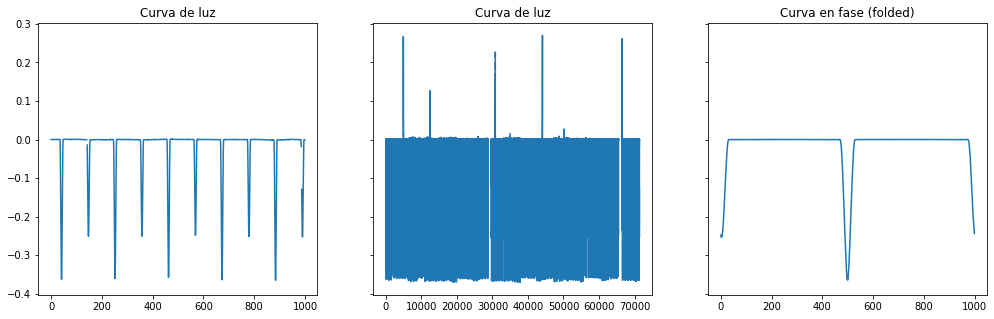

Clean done (remove outliers iterativetly), erase 0 values


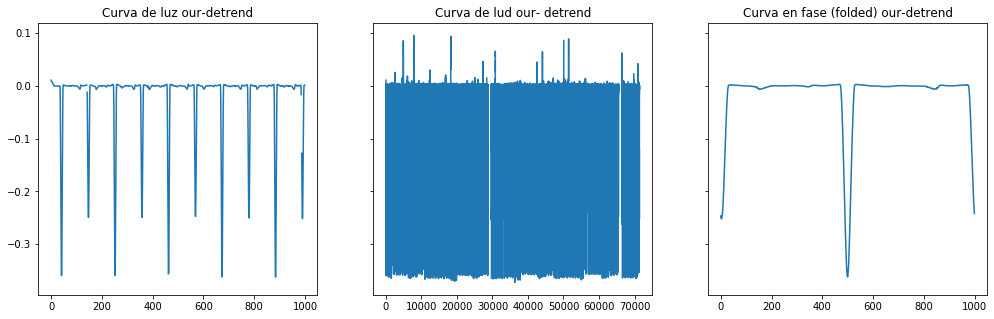

In [13]:

p_n = 1000
for n_sampled in n_sampleds:
    print(n_sampled)
    
    fluxs = lc_kepler[n_sampled]
    time_i = time_kepler[n_sampled]
    
    f, axx = plt.subplots(1, 3,figsize= (17,5),sharey=True)
    axx[0].plot(fluxs[:p_n])
    axx[0].set_title("Curva de luz")
    
    axx[1].plot(fluxs)
    axx[1].set_title("Curva de luz")
    
    per, t0 = df[["Period", "Time of Transit Epoch"]].values[n_sampled]
    mask_v = ~np.isnan(fluxs)
    f_glo = global_fold(time_i[mask_v], fluxs[mask_v], per, t0)
    axx[2].plot(f_glo)
    axx[2].set_title("Curva en fase (folded)")
    plt.show()
    
    
    fluxs = clean_LC(fluxs, kernel_median=25, kernel_pol=151, savgol=True, median_t='subtract',plot=False) 
    
    f, axx = plt.subplots(1, 3,figsize= (17,5),sharey=True)
    axx[0].plot(fluxs[:p_n])
    axx[0].set_title("Curva de luz our-detrend")
    
    axx[1].plot(fluxs)
    axx[1].set_title("Curva de lud our- detrend")
    
    per, t0 = df[["Period", "Time of Transit Epoch"]].values[n_sampled]
    mask_v = ~np.isnan(fluxs)
    f_glo = global_fold(time_i[mask_v], fluxs[mask_v], per, t0)
    axx[2].plot(f_glo)
    axx[2].set_title("Curva en fase (folded) our-detrend")
    plt.show()

5696


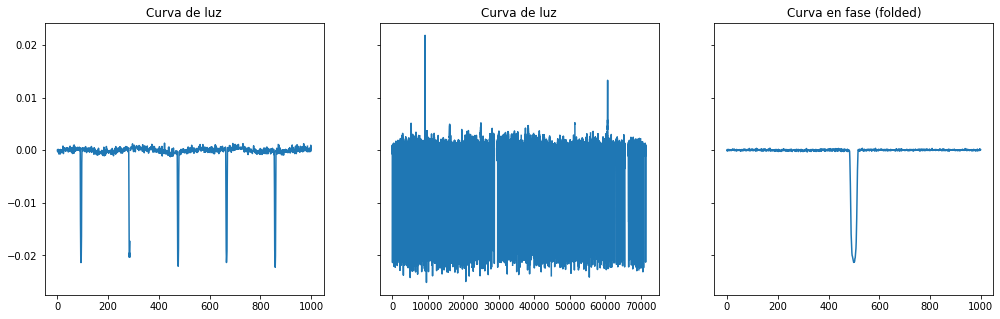

Clean done (remove outliers iterativetly), erase 1 values


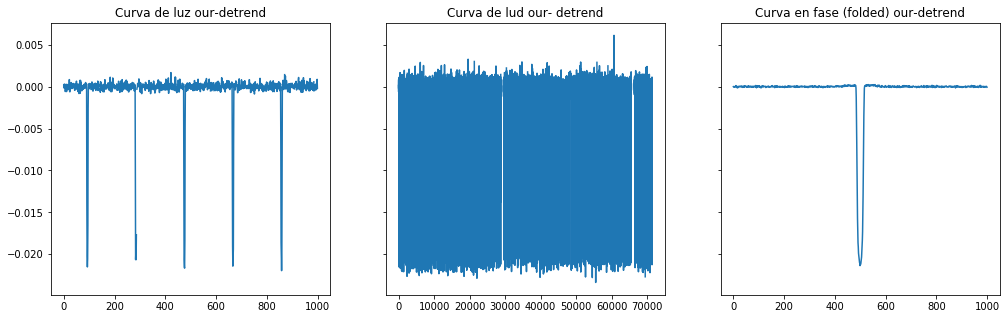

6067


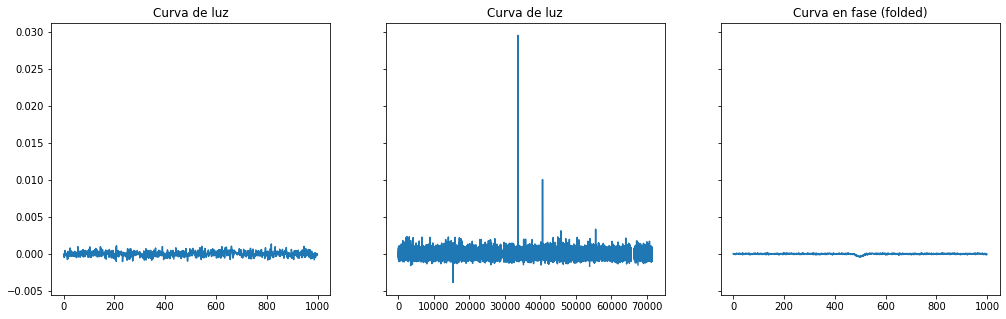

Clean done (remove outliers iterativetly), erase 38 values


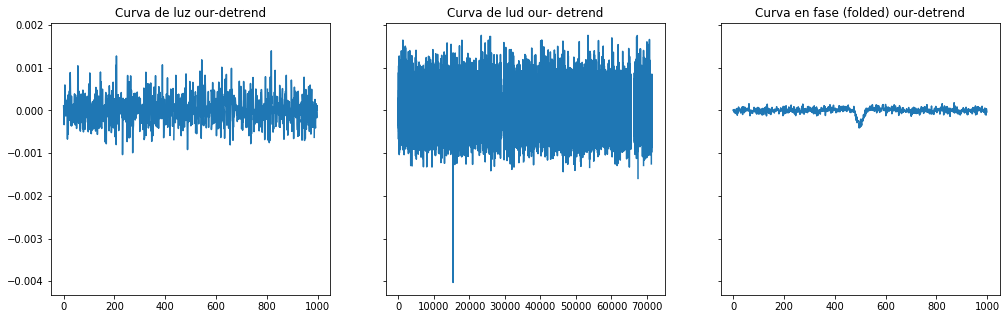

2292


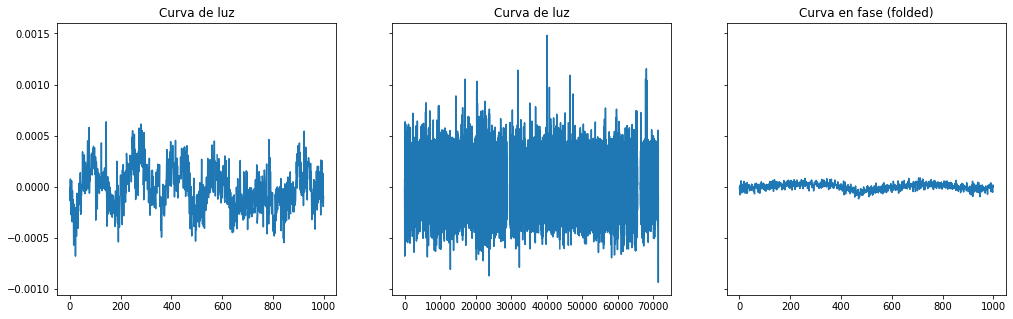

Clean done (remove outliers iterativetly), erase 26 values


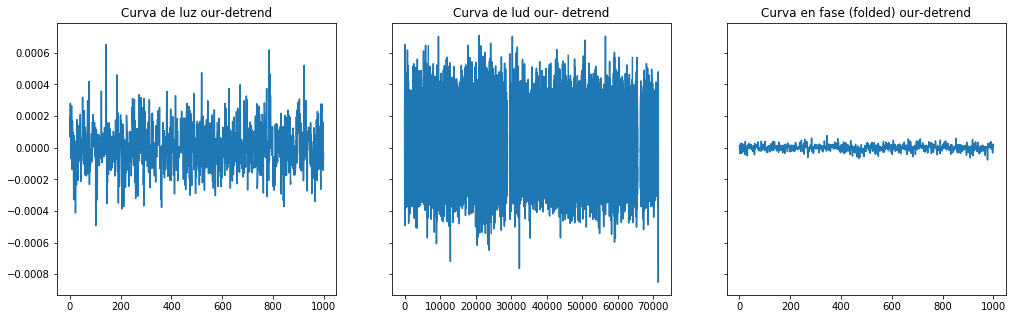

5230


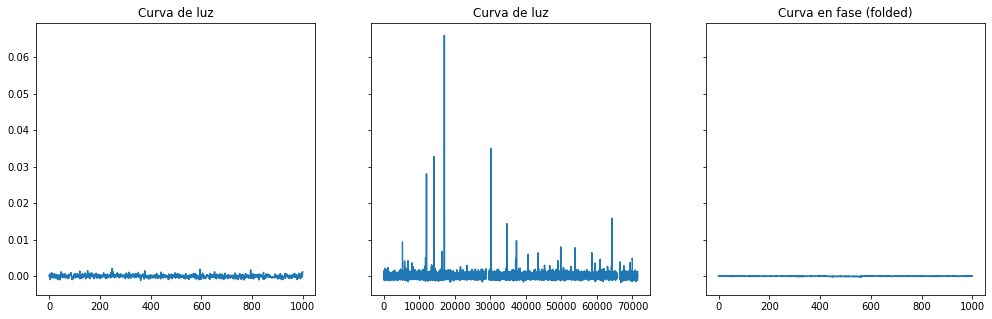

Clean done (remove outliers iterativetly), erase 72 values


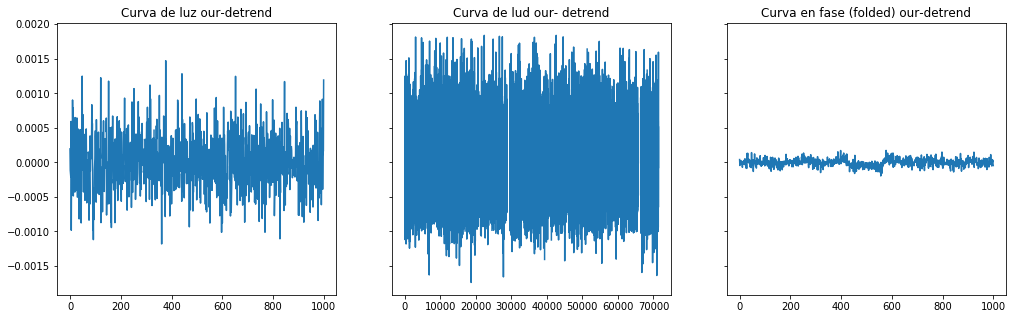

4386


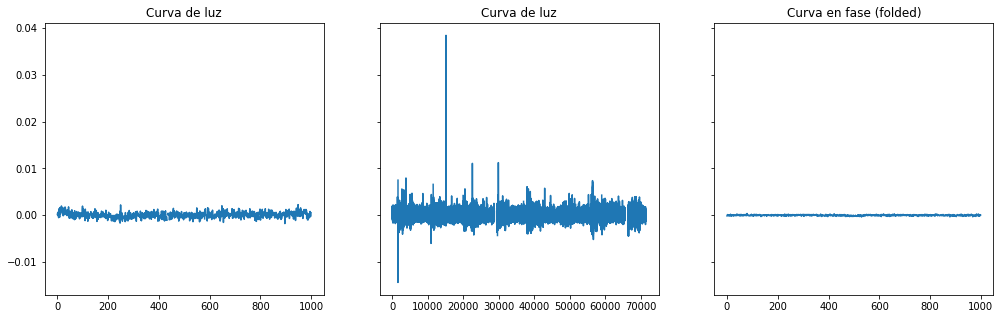

Clean done (remove outliers iterativetly), erase 40 values


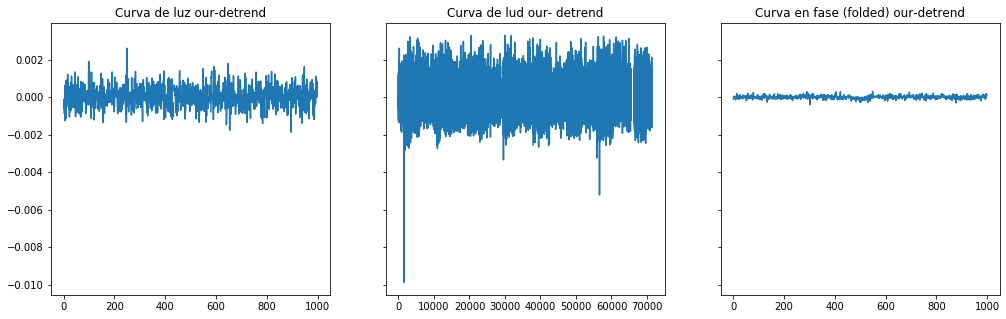

1702


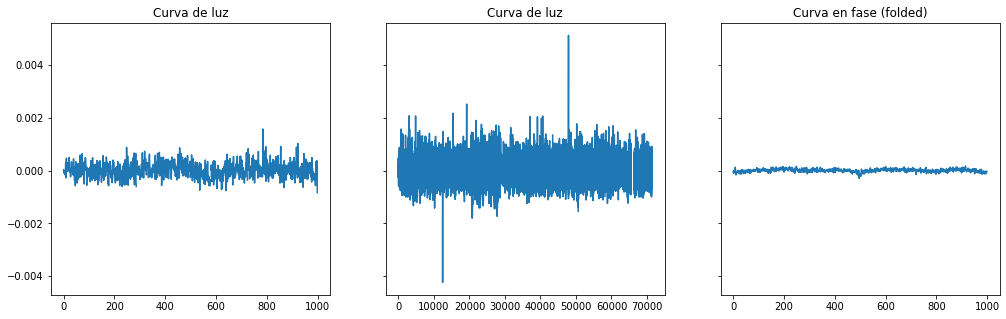

Clean done (remove outliers iterativetly), erase 28 values


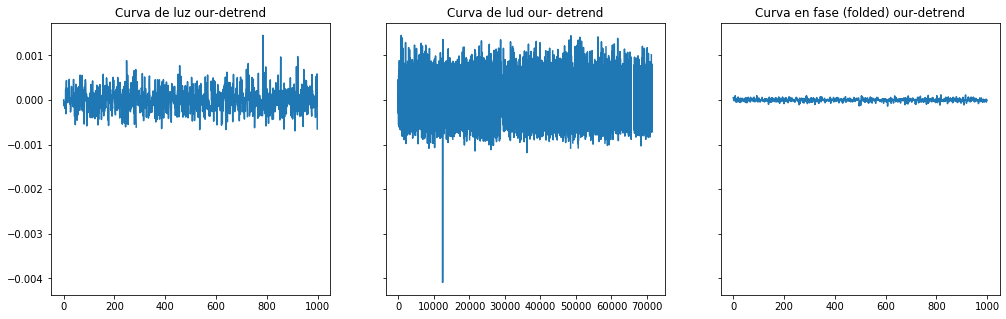

7516


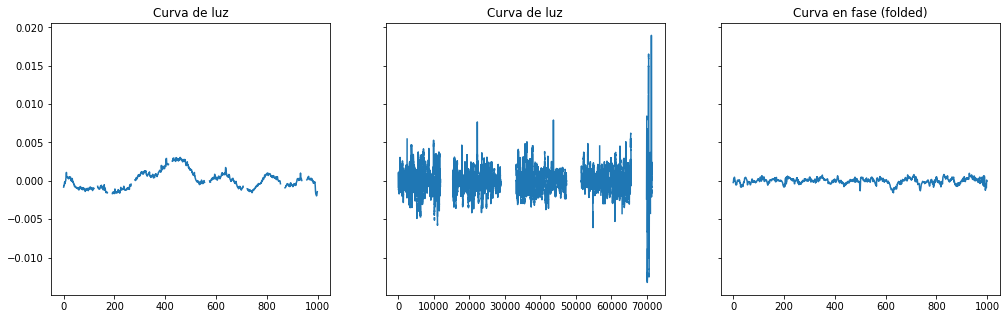

Clean done (remove outliers iterativetly), erase 92 values


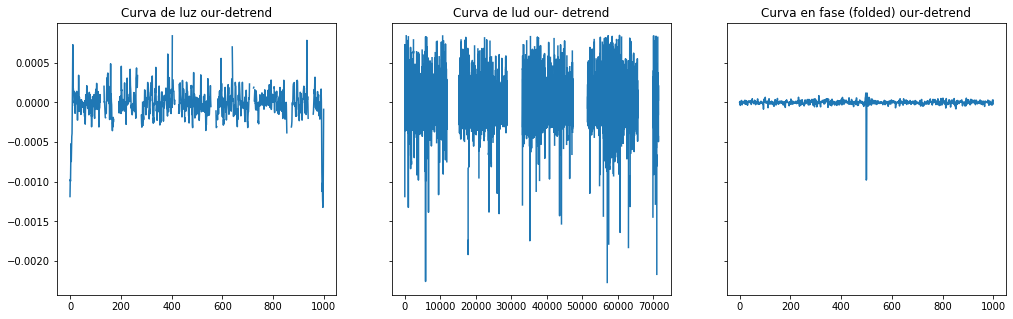

2124


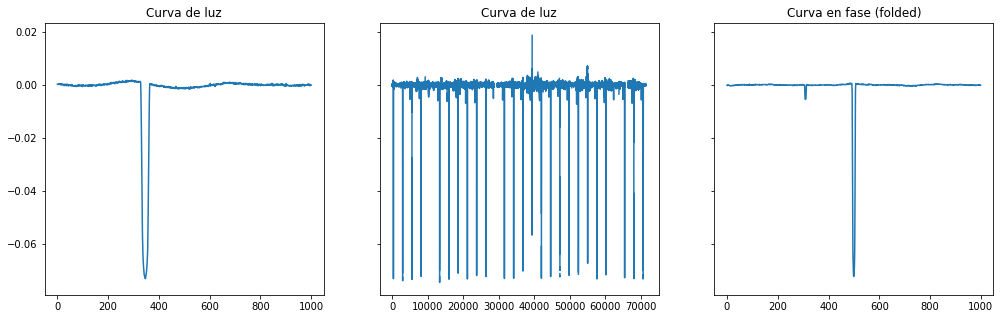

Clean done (remove outliers iterativetly), erase 175 values


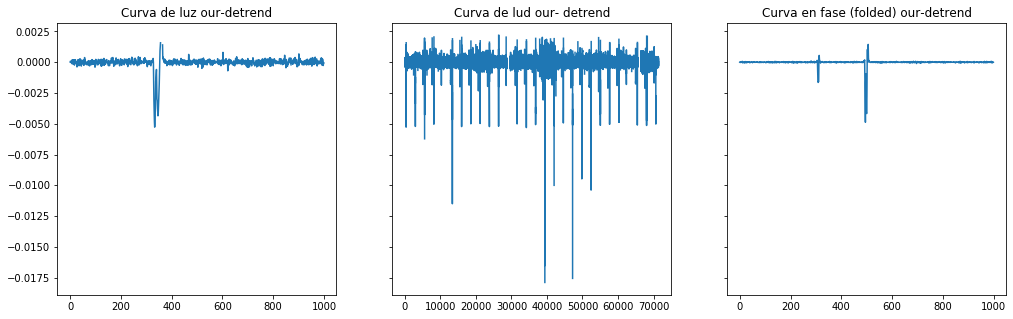

5800


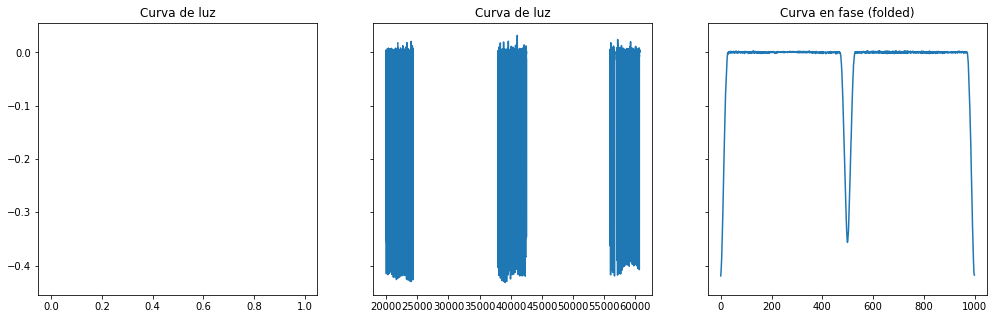

Clean done (remove outliers iterativetly), erase 0 values


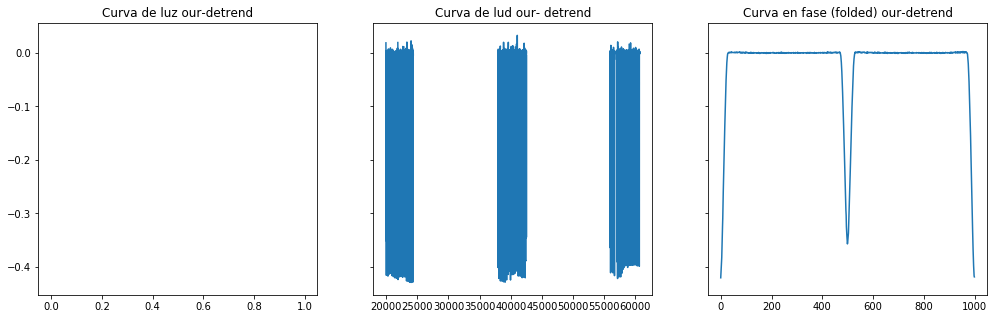

7704


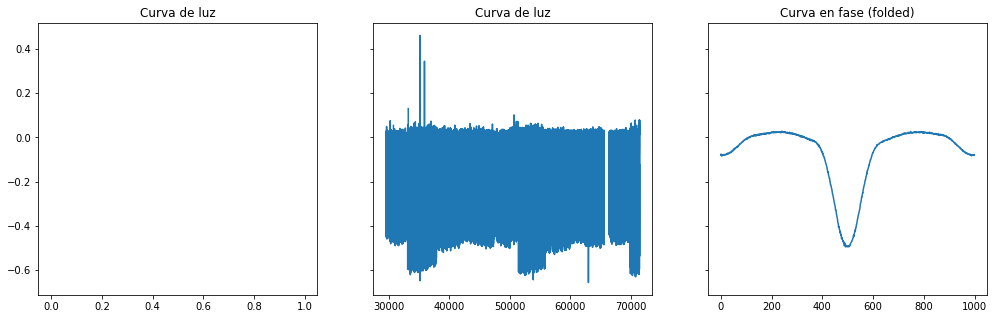

Clean done (remove outliers iterativetly), erase 0 values


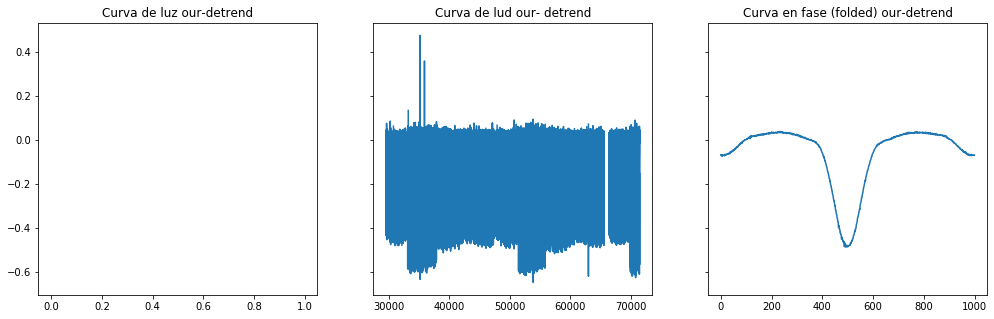

7751


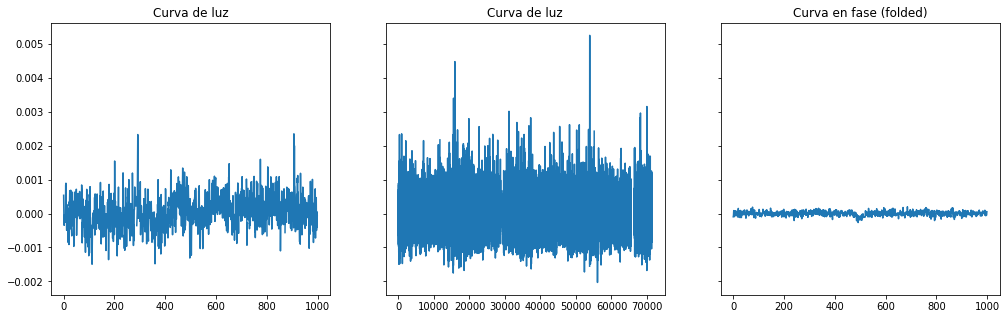

Clean done (remove outliers iterativetly), erase 36 values


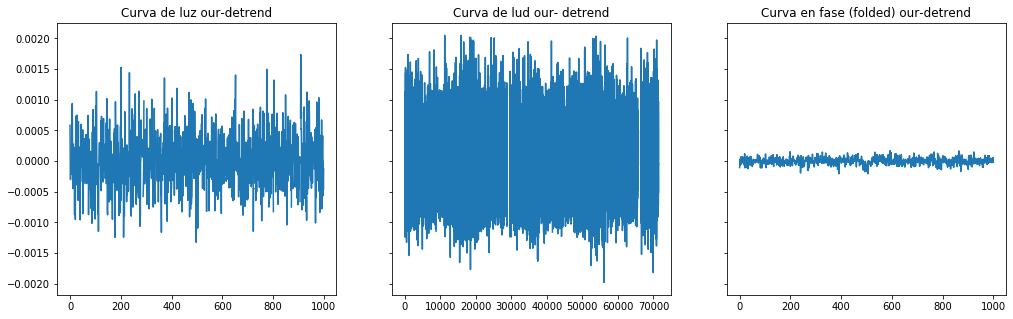

4015


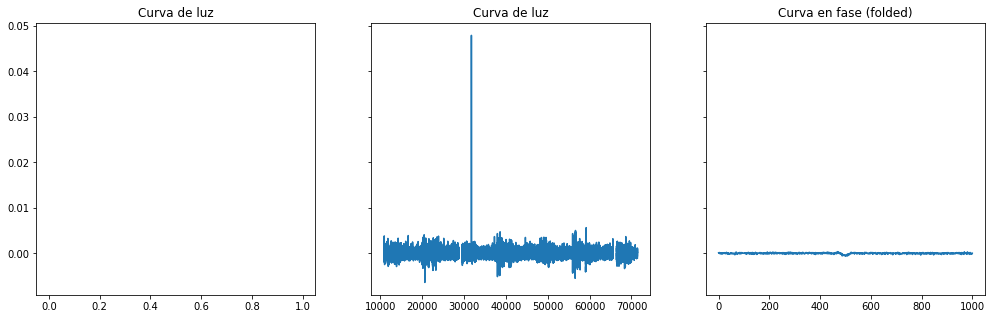

Clean done (remove outliers iterativetly), erase 25 values


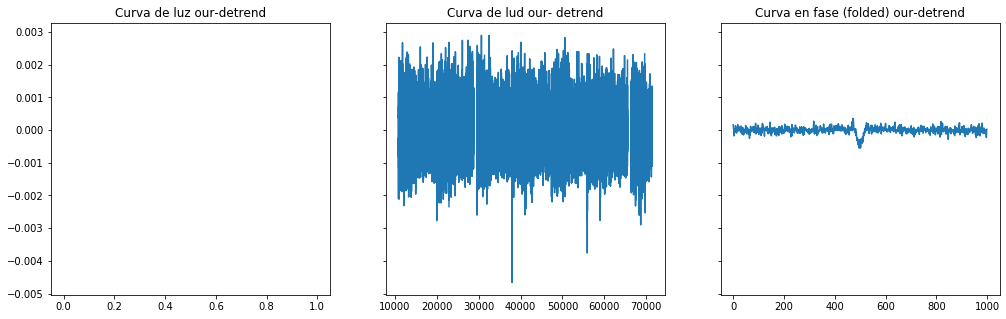

894


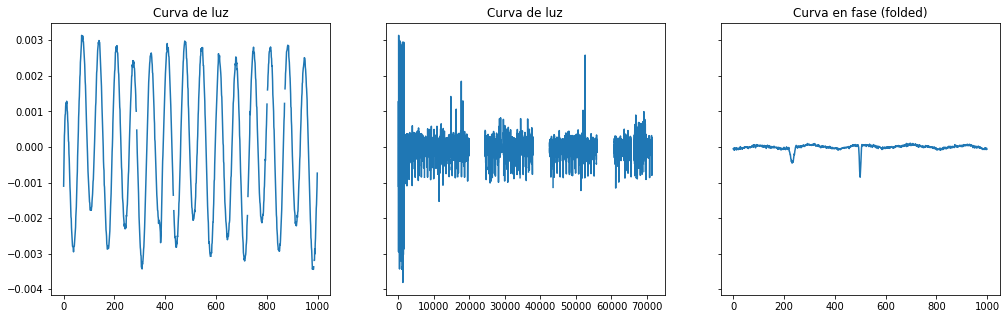

Clean done (remove outliers iterativetly), erase 94 values


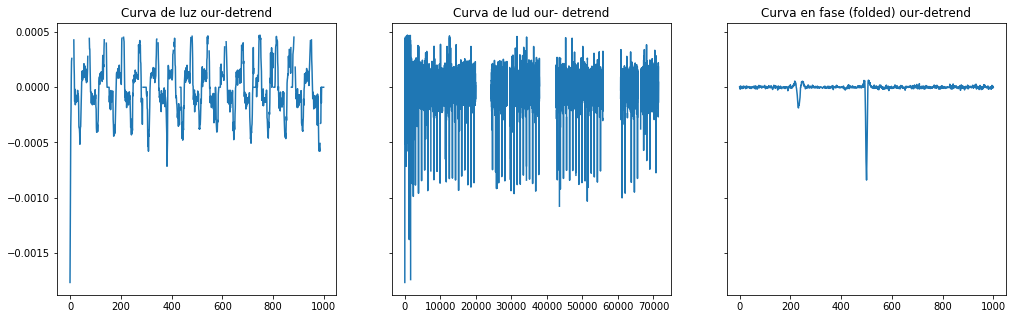

3085


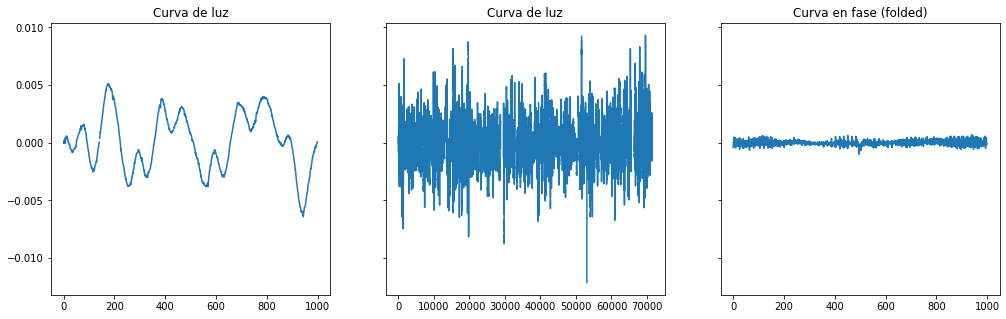

Clean done (remove outliers iterativetly), erase 98 values


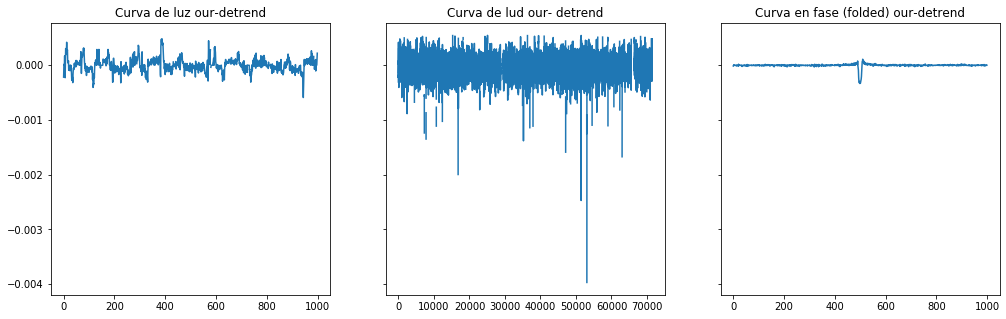

4199


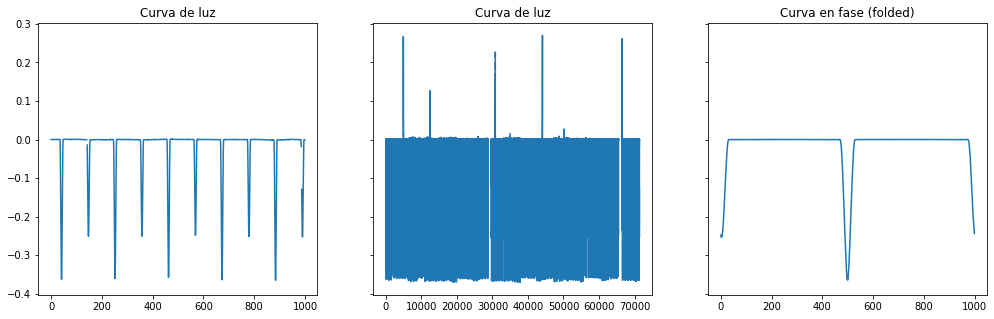

Clean done (remove outliers iterativetly), erase 0 values


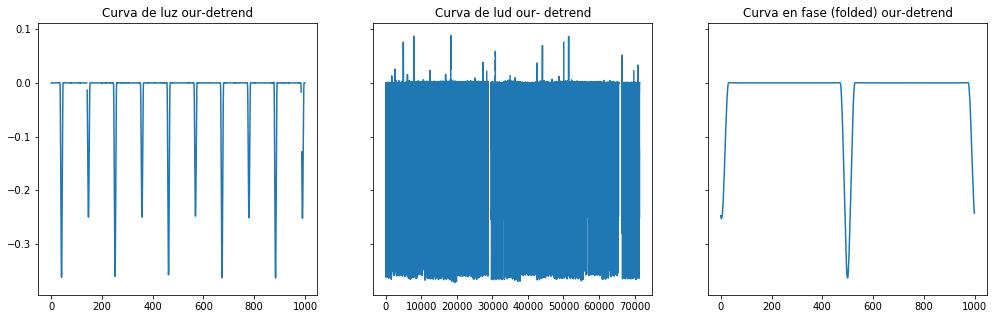

In [14]:
p_n = 1000
for n_sampled in n_sampleds:
    print(n_sampled)

    fluxs = lc_kepler[n_sampled]
    time_i = time_kepler[n_sampled]
    
    f, axx = plt.subplots(1, 3,figsize= (17,5),sharey=True)
    axx[0].plot(fluxs[:p_n])
    axx[0].set_title("Curva de luz")
    
    axx[1].plot(fluxs)
    axx[1].set_title("Curva de luz")
    
    per, t0 = df[["Period", "Time of Transit Epoch"]].values[n_sampled]
    mask_v = ~np.isnan(fluxs)
    f_glo = global_fold(time_i[mask_v], fluxs[mask_v], per, t0)
    axx[2].plot(f_glo)
    axx[2].set_title("Curva en fase (folded)")
    plt.show()
    
    
    fluxs = clean_LC(fluxs, kernel_median=25, median_t='subtract', savgol=False, plot=False) 
    
    f, axx = plt.subplots(1, 3,figsize= (17,5),sharey=True)
    axx[0].plot(fluxs[:p_n])
    axx[0].set_title("Curva de luz our-detrend")
    
    axx[1].plot(fluxs)
    axx[1].set_title("Curva de lud our- detrend")
    
    per, t0 = df[["Period", "Time of Transit Epoch"]].values[n_sampled]
    mask_v = ~np.isnan(fluxs)
    f_glo = global_fold(time_i[mask_v], fluxs[mask_v], per, t0)
    axx[2].plot(f_glo)
    axx[2].set_title("Curva en fase (folded) our-detrend")
    plt.show()

5696


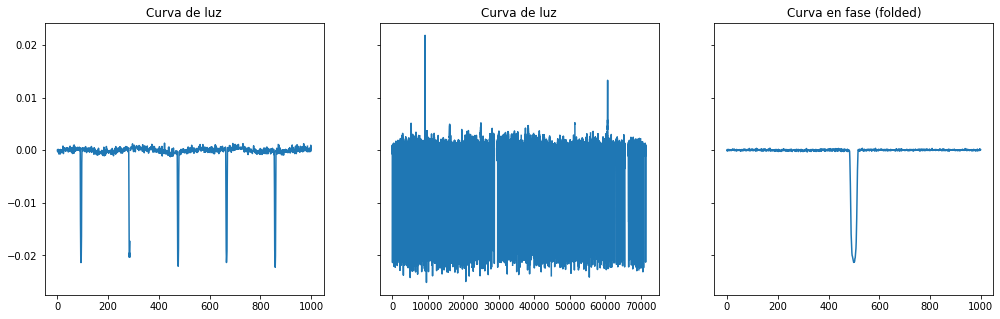

Clean done (remove outliers iterativetly), erase 0 values


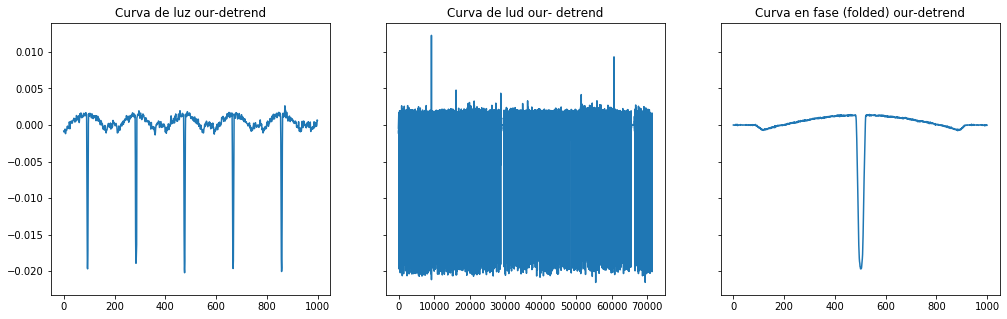

6067


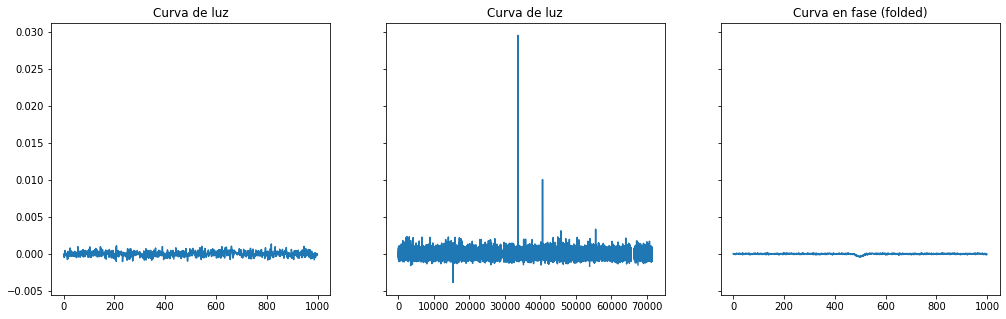

Clean done (remove outliers iterativetly), erase 20 values


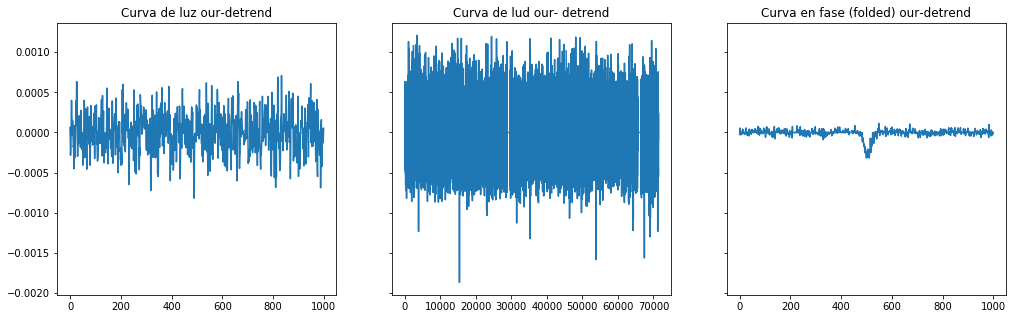

2292


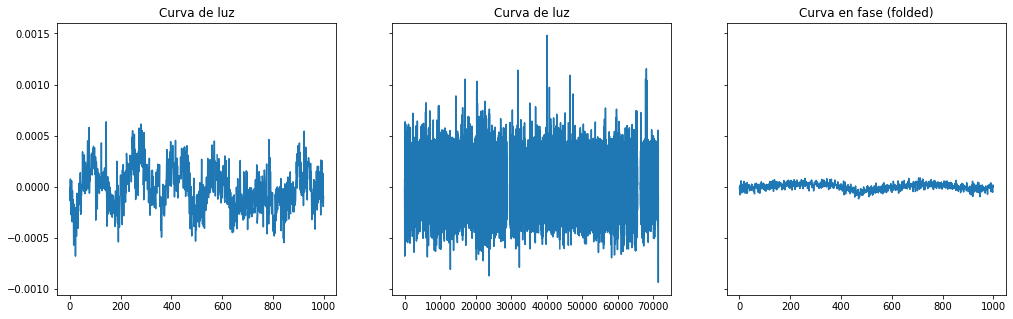

Clean done (remove outliers iterativetly), erase 11 values


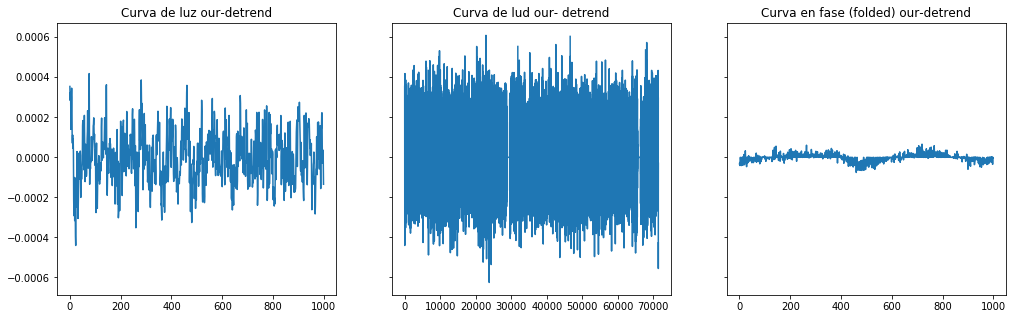

5230


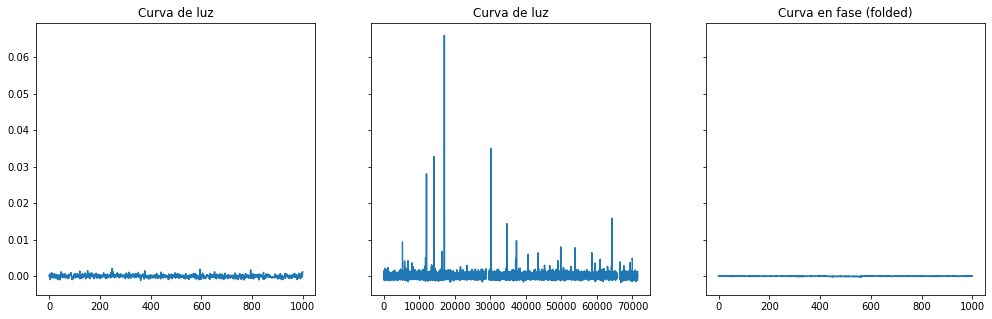

In [ ]:
p_n = 1000
for n_sampled in n_sampleds:
    print(n_sampled)

    fluxs = lc_kepler[n_sampled]
    time_i = time_kepler[n_sampled]
    
    f, axx = plt.subplots(1, 3,figsize= (17,5),sharey=True)
    axx[0].plot(fluxs[:p_n])
    axx[0].set_title("Curva de luz")
    
    axx[1].plot(fluxs)
    axx[1].set_title("Curva de luz")
    
    per, t0 = df[["Period", "Time of Transit Epoch"]].values[n_sampled]
    mask_v = ~np.isnan(fluxs)
    f_glo = global_fold(time_i[mask_v], fluxs[mask_v], per, t0)
    axx[2].plot(f_glo)
    axx[2].set_title("Curva en fase (folded)")
    plt.show()
    
    
    fluxs = clean_LC(fluxs, kernel_median=1, median_t='smooth', savgol=True, plot=False) 
    
    f, axx = plt.subplots(1, 3,figsize= (17,5),sharey=True)
    axx[0].plot(fluxs[:p_n])
    axx[0].set_title("Curva de luz our-detrend")
    
    axx[1].plot(fluxs)
    axx[1].set_title("Curva de lud our- detrend")
    
    per, t0 = df[["Period", "Time of Transit Epoch"]].values[n_sampled]
    mask_v = ~np.isnan(fluxs)
    f_glo = global_fold(time_i[mask_v], fluxs[mask_v], per, t0)
    axx[2].plot(f_glo)
    axx[2].set_title("Curva en fase (folded) our-detrend")
    plt.show()

### NEw clean

In [ ]:
process_lc = []
for i in range(N):
    if i%1000 == 0:
        print("Va en el ",i)
    lc_cleaned = clean_LC(lc_kepler[i], kernel_median=25,kernel_pol=151,savgol=True,tipo_median='subtract',plot=False) 
    process_lc.append(lc_cleaned)
process_lc = np.asarray(process_lc)
process_lc.shape

In [ ]:
#save on another folder
np.save(folder_lc+'/cleaned/LC_kepler_processed_v2.npy', process_lc)